<a href="https://colab.research.google.com/github/renzotaco/ErrorGraficoPie/blob/main/ML_EstilosDeVida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the data from the Excel file "EstilosDeVida_InteresProfesional.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame and perform initial data checks.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    display(df.head())
    print(df.columns)
    print(df.info())
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None #Set df to None to indicate an error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None #Set df to None to indicate an error

VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  VDD2  VDD3
0  59.0  44   5.0    11    10     4    14     9     6    10     9     5
1  82.0  51   8.0    20    20     5     9    13     7     9     9     6
2  87.0  60   5.0    19    10     8    15    15    15     8    12     7
3  70.0  37   5.0    17    18     4    15     6     5     9     6     5
4  73.0  41   5.0    15    13    12     6    15     7     8     7     4

Index(['VI', 'VD', 'VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7',
       'VDD1', 'VDD2', 'VDD3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VI      378 non-null    float64
 1   VD      379 non-null    int64  
 2   VID1    378 non-null    float64
 3   VID2    379 non-null    int64  
 4   VID3    379 non-null    int64  
 5   VID4    379 non-null    int64  
 6   VID5    379 non-null    int64  
 7   VID6    379 non-null    int64  
 8   VID7    379 non-null    int64  
 9   VDD1    379 non-null    int64  
 10  VDD2    379 non-null    int64  
 11  VDD3    379 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 35.7 KB
None


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics and identify potential issues.


**Reasoning**:
Explore the dataset by examining data types, missing values, distributions, descriptive statistics, correlations, and data shape.  Visualize missing values with a heatmap, distributions with histograms and box plots, and correlations with matrices and scatter plots.



Data Types:
 VI      float64
VD        int64
VID1    float64
VID2      int64
VID3      int64
VID4      int64
VID5      int64
VID6      int64
VID7      int64
VDD1      int64
VDD2      int64
VDD3      int64
dtype: object

Missing Values:
 VI      1
VD      0
VID1    1
VID2    0
VID3    0
VID4    0
VID5    0
VID6    0
VID7    0
VDD1    0
VDD2    0
VDD3    0
dtype: int64

Missing Value Percentage:
 VI      0.263852
VD      0.000000
VID1    0.263852
VID2    0.000000
VID3    0.000000
VID4    0.000000
VID5    0.000000
VID6    0.000000
VID7    0.000000
VDD1    0.000000
VDD2    0.000000
VDD3    0.000000
dtype: float64


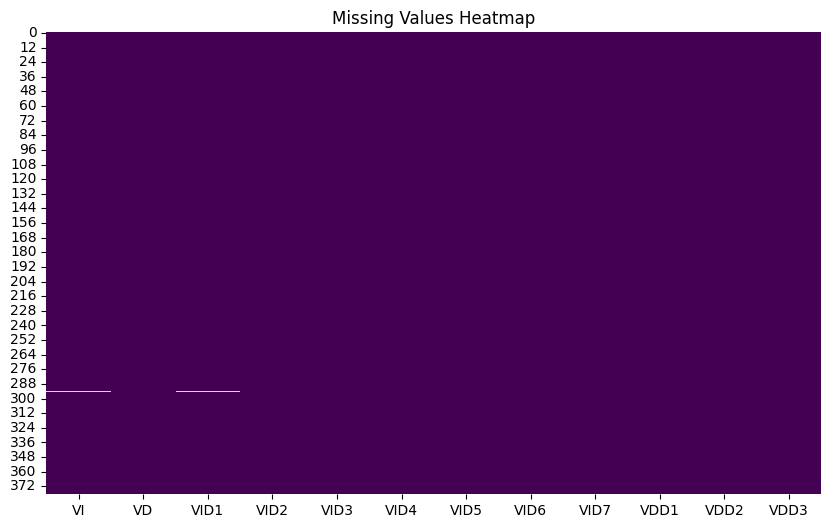

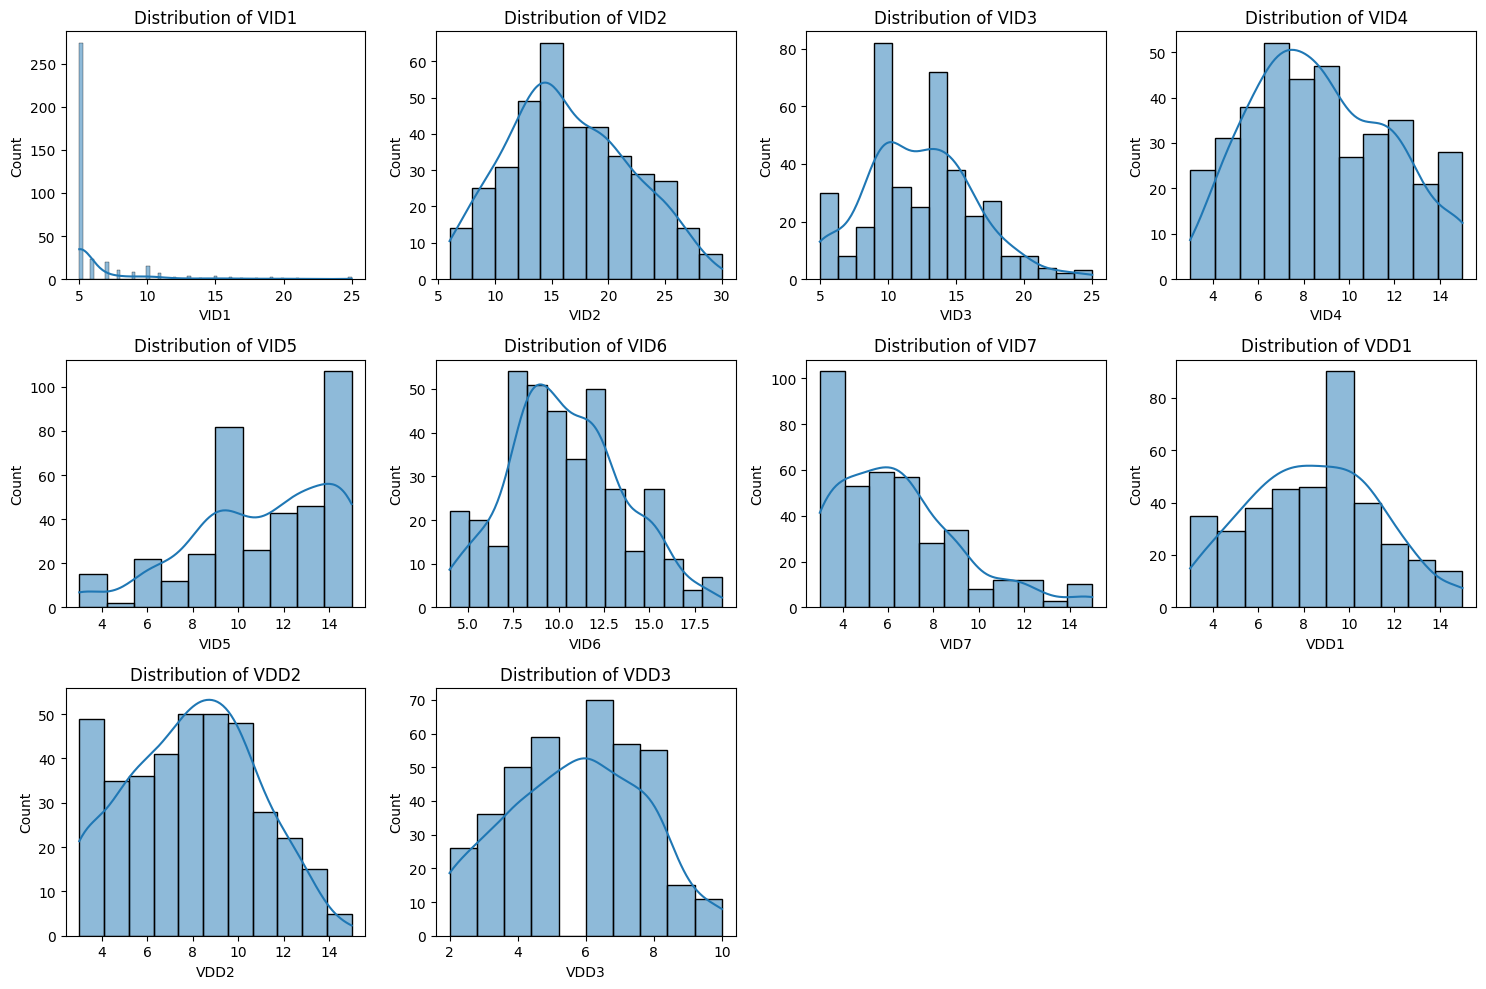

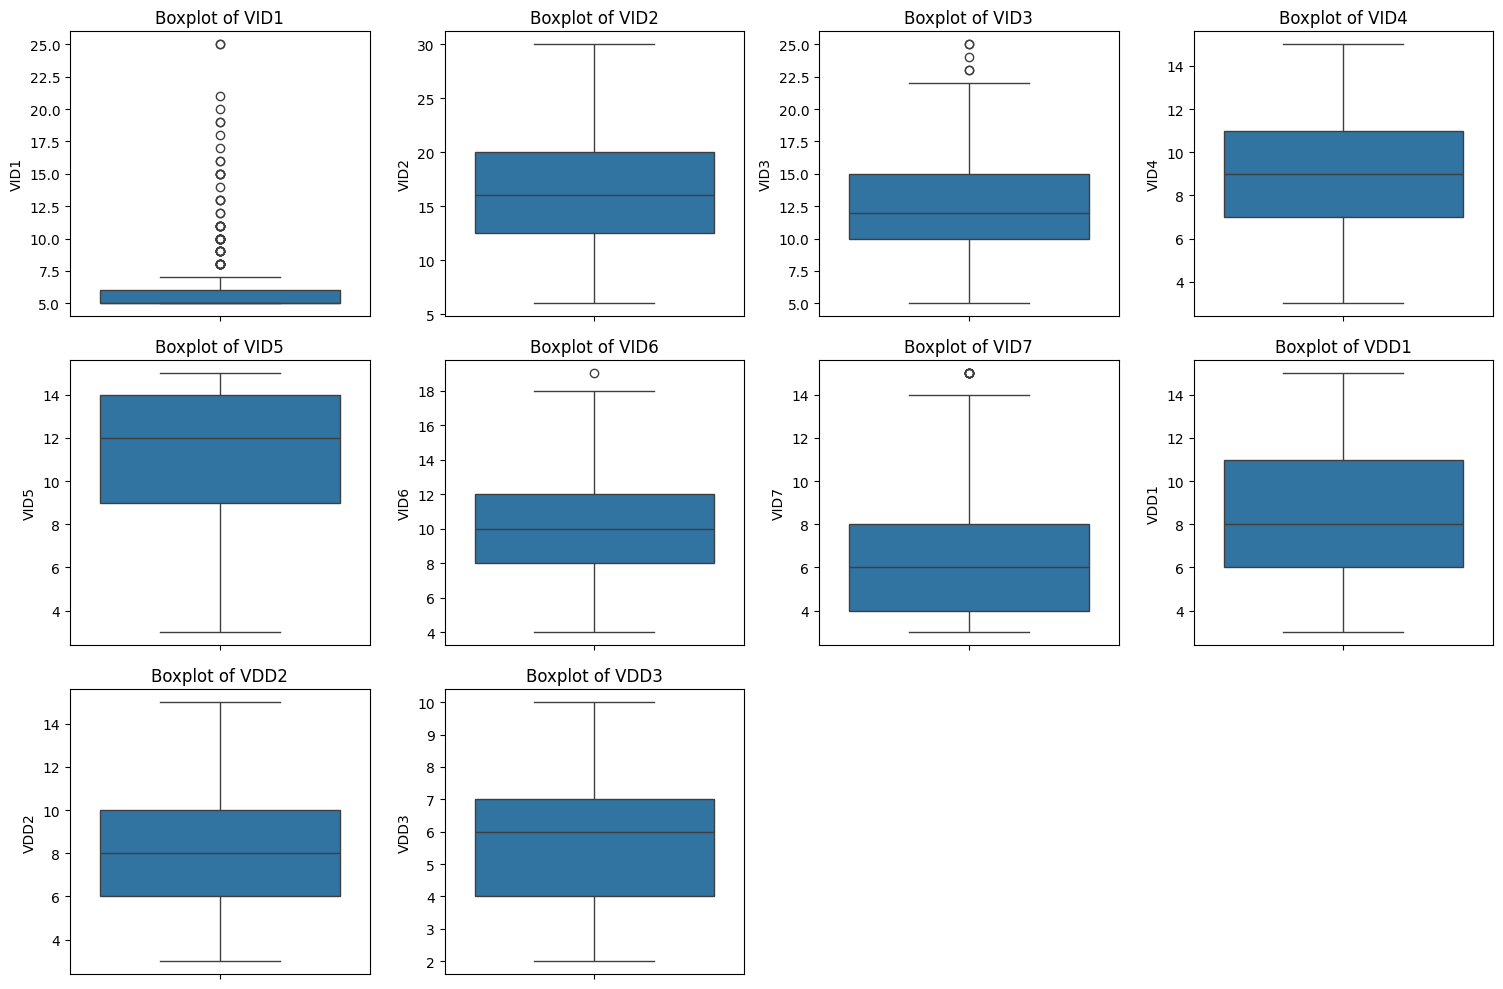


Descriptive Statistics:
                VI          VD        VID1        VID2        VID3        VID4  \
count  378.000000  379.000000  378.000000  379.000000  379.000000  379.000000   
mean    71.791005   46.150396    6.264550   16.419525   12.332454    8.812665   
std     12.835677   11.209693    2.981617    5.377864    3.970163    3.014822   
min     44.000000   19.000000    5.000000    6.000000    5.000000    3.000000   
25%     63.250000   38.000000    5.000000   12.500000   10.000000    7.000000   
50%     70.000000   46.000000    5.000000   16.000000   12.000000    9.000000   
75%     79.000000   54.000000    6.000000   20.000000   15.000000   11.000000   
max    120.000000   81.000000   25.000000   30.000000   25.000000   15.000000   

             VID5        VID6        VID7        VDD1        VDD2        VDD3  
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000  
mean    11.084433   10.401055    6.467018    8.459103    7.949868    5.696570  
std 

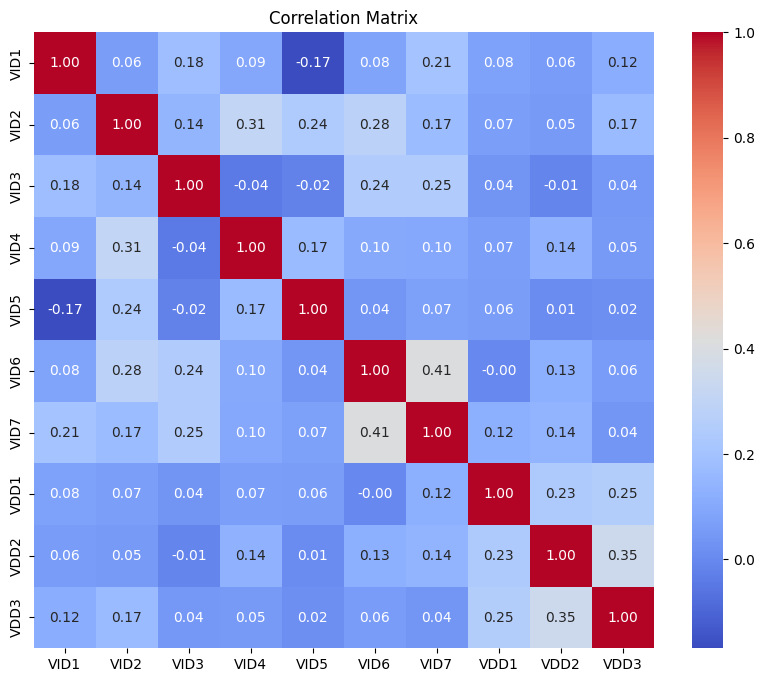

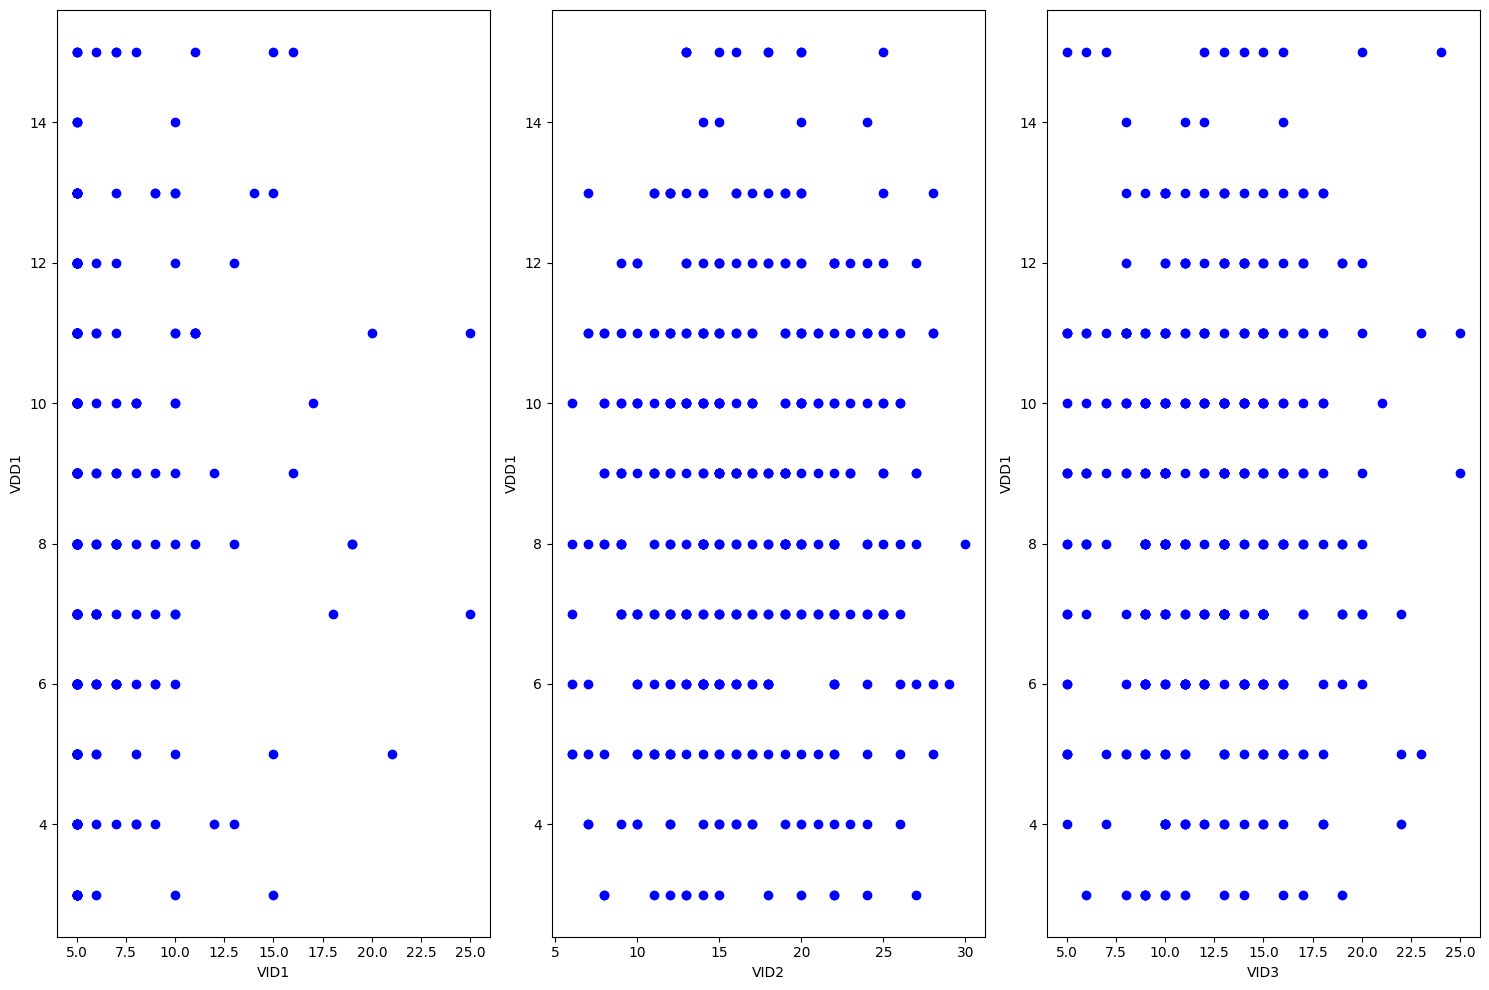


Data Shape: (379, 12)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df.dtypes)

# 2. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 3. Analyze distributions
numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# 4. Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())
categorical_cols = ['VI', 'VD'] # Assuming 'VI' and 'VD' are categorical
for col in categorical_cols:
    print(f"\nFrequencies and Proportions for {col}:\n", df[col].value_counts(normalize=True))


# 5. Investigate correlations
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for selected correlations
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:3]): # Example for the first 3 numerical columns
    plt.subplot(1,3, i + 1)
    plt.scatter(df[col], df['VDD1'], color = 'blue')
    plt.xlabel(col)
    plt.ylabel('VDD1')
plt.tight_layout()
plt.show()

# 6. Data shape
print("\nData Shape:", df.shape)

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Handle missing values in 'VI' and 'VID1' by removing rows with missing values due to the small percentage of missing data. Then, handle outliers using the IQR method for numerical features. Finally, check for inconsistencies in 'VI' and 'VD' columns and across dimensions.



In [ ]:
# Handle missing values
df.dropna(subset=['VI', 'VID1'], inplace=True)

# Handle outliers using IQR method
numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Data consistency checks
# Check for inconsistencies in 'VI' and 'VD'
print(df['VI'].unique())
print(df['VD'].unique())

#Check for illogical combinations across dimensions (example)
#This is just an example, other inconsistencies could exist
#You might need to explore further based on domain knowledge
print(df[(df['VID4'] > 15) & (df['VDD1'] < 5)]) #Example: high physical activity, low interest in health sciences

#If you find inconsistencies, replace this with the specific handling code
print("No inconsistencies found or handled.")

[ 59.  82.  87.  70.  73.  92.  78.  80.  69.  93.  76.  77.  86.  89.
  66.  71.  72.  74.  46.  67.  65. 104.  91.  83.  88.  62.  54.  97.
  75.  79.  61.  48.  64.  60. 106.  55.  50.  51.  81.  44.  90.  94.
  58.  63.  68.  84. 105.  57.  49.  53.  47. 100.  85.  56.  96. 120.
  52.  99.  95. 102.]
[44 51 60 37 41 42 35 50 22 75 61 31 68 34 45 58 47 40 23 74 57 53 59 29
 55 28 63 56 67 38 30 46 64 27 39 49 52 54 36 43 48 81 62 71 25 65 69 19
 26 33 77 70 32 66 24 73]
Empty DataFrame
Columns: [VI, VD, VID1, VID2, VID3, VID4, VID5, VID6, VID7, VDD1, VDD2, VDD3]
Index: []
No inconsistencies found or handled.


## Data wrangling

### Subtask:
Prepare the data for machine learning model training.


**Reasoning**:
Convert categorical features to numerical representations, scale numerical features, and create interaction terms.



In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Convert categorical variables to numerical (if needed)
# 'VI' and 'VD' are already numerical after previous cleaning steps.

# 2. Scale numerical features
scaler = StandardScaler()
numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Create new features (interaction terms)
# Example: Interaction between 'VID4' (physical activity) and 'VDD1' (interest in health sciences)
df['VID4_VDD1_interaction'] = df['VID4'] * df['VDD1']

# Add more interaction terms or polynomial features as needed based on domain knowledge
# Example: Interaction between 'VID6' (processed food) and 'VDD3' (social sciences)
df['VID6_VDD3_interaction'] = df['VID6'] * df['VDD3']

display(df.head())

VI  VD      VID1      VID2      VID3      VID4      VID5      VID6  \
0  59.0  44 -0.583058 -1.009208 -0.591873 -1.595530  0.923877 -0.447499   
1  82.0  51  1.973740  0.664768  1.963557 -1.263603 -0.657760  0.829139   
2  87.0  60 -0.583058  0.478771 -0.591873 -0.267824  1.240204  1.467457   
3  70.0  37 -0.583058  0.106776  1.452471 -1.595530  1.240204 -1.404977   
4  73.0  41 -0.583058 -0.265218  0.174756  1.059881 -1.606742  1.467457   

       VID7      VDD1      VDD2      VDD3  VID4_VDD1_interaction  \
0 -0.168403  0.539232  0.371771 -0.343370              -0.860360   
1  0.201691  0.190805  0.371771  0.150143              -0.241102   
2  2.792350 -0.157622  1.441792  0.643655               0.042215   
3 -0.538497  0.190805 -0.698250 -0.343370              -0.304435   
4  0.201691 -0.157622 -0.341576 -0.836882              -0.167060   

   VID6_VDD3_interaction  
0               0.153657  
1               0.124489  
2               0.944537  
3               0.482427  
4              -1.228089

## Data visualization

### Subtask:
Visualize the relationships between independent and dependent variables.


**Reasoning**:
Visualize the relationships between independent and dependent variables using histograms, box plots, scatter plots, pair plots, heatmaps, and additional box plots.



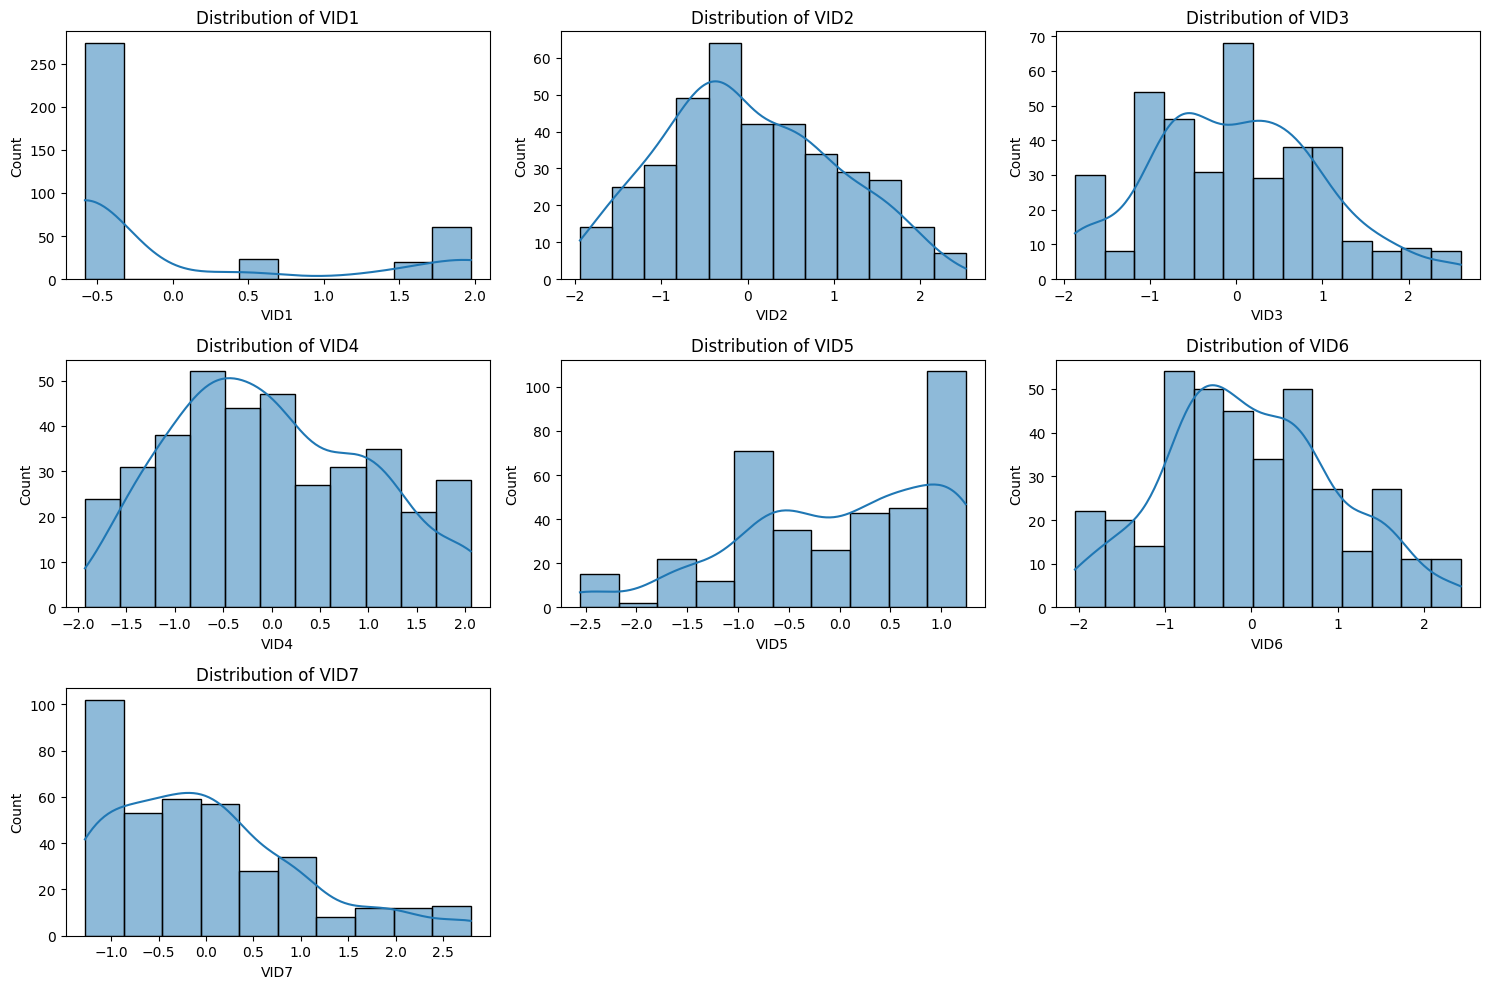

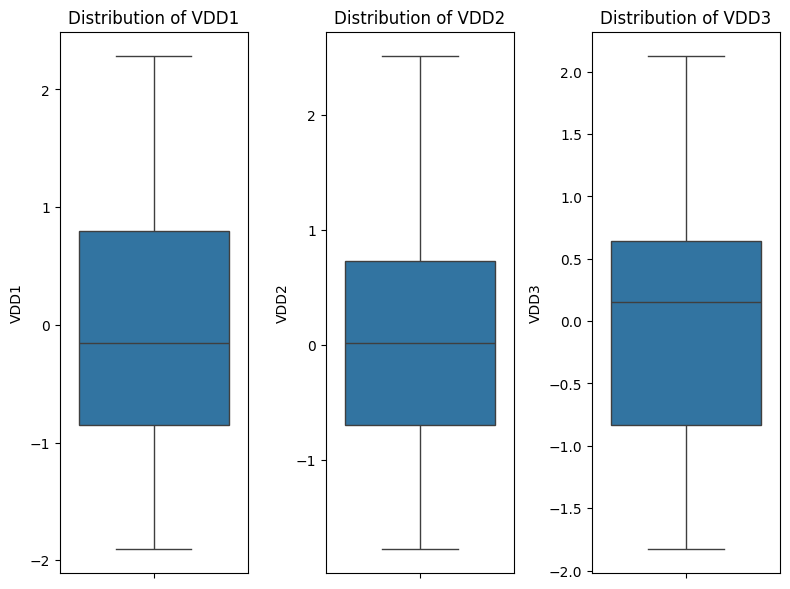

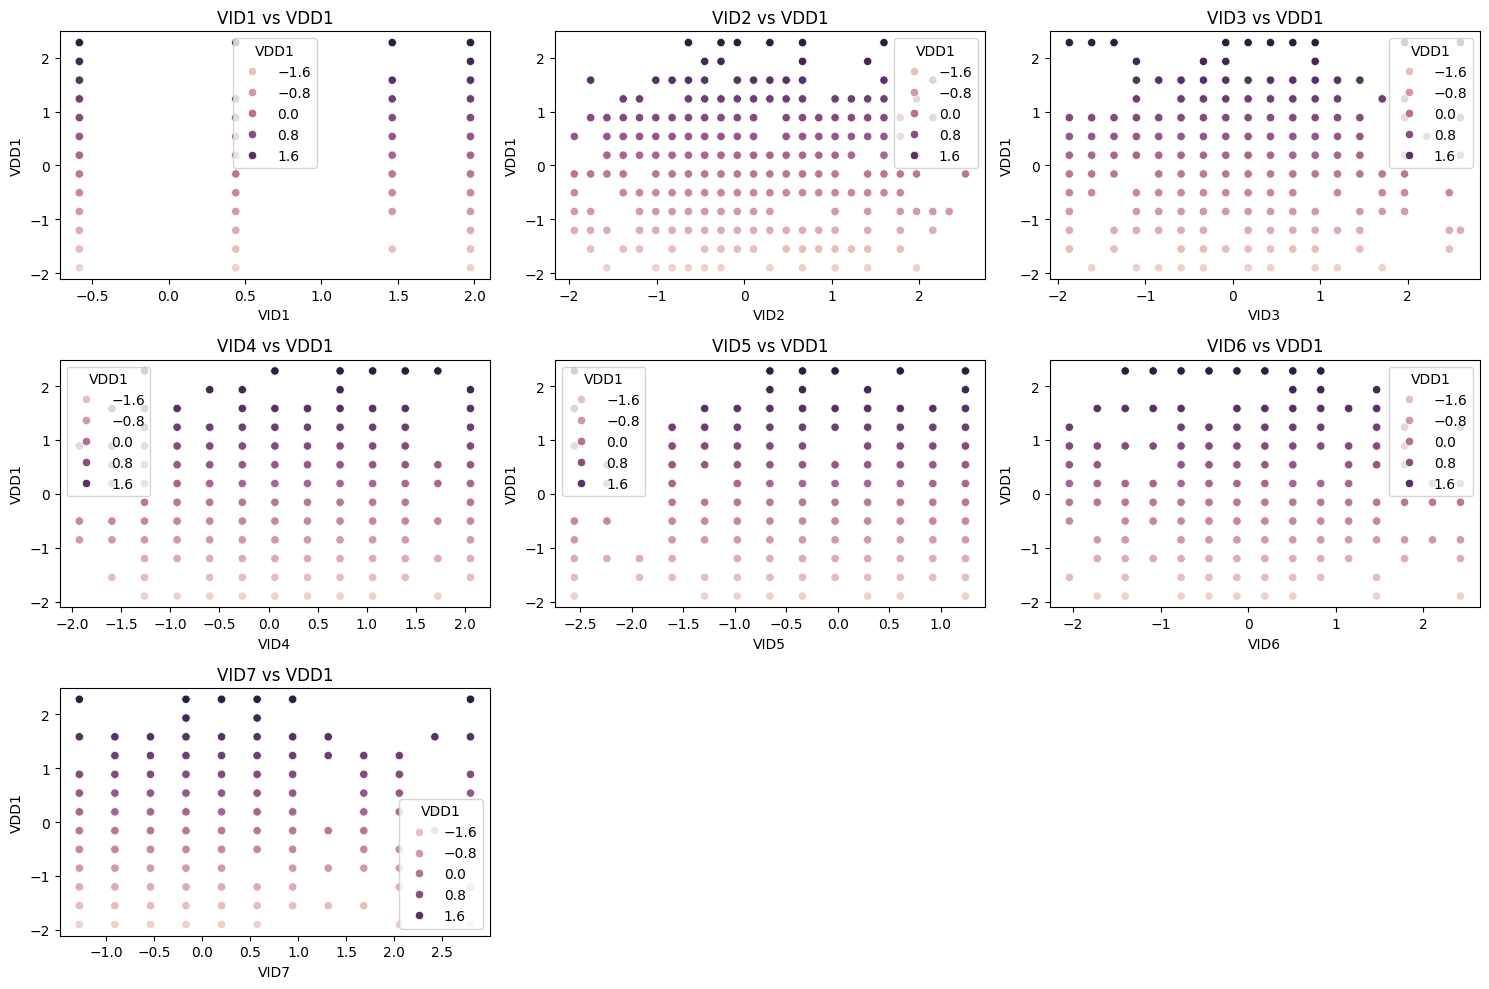

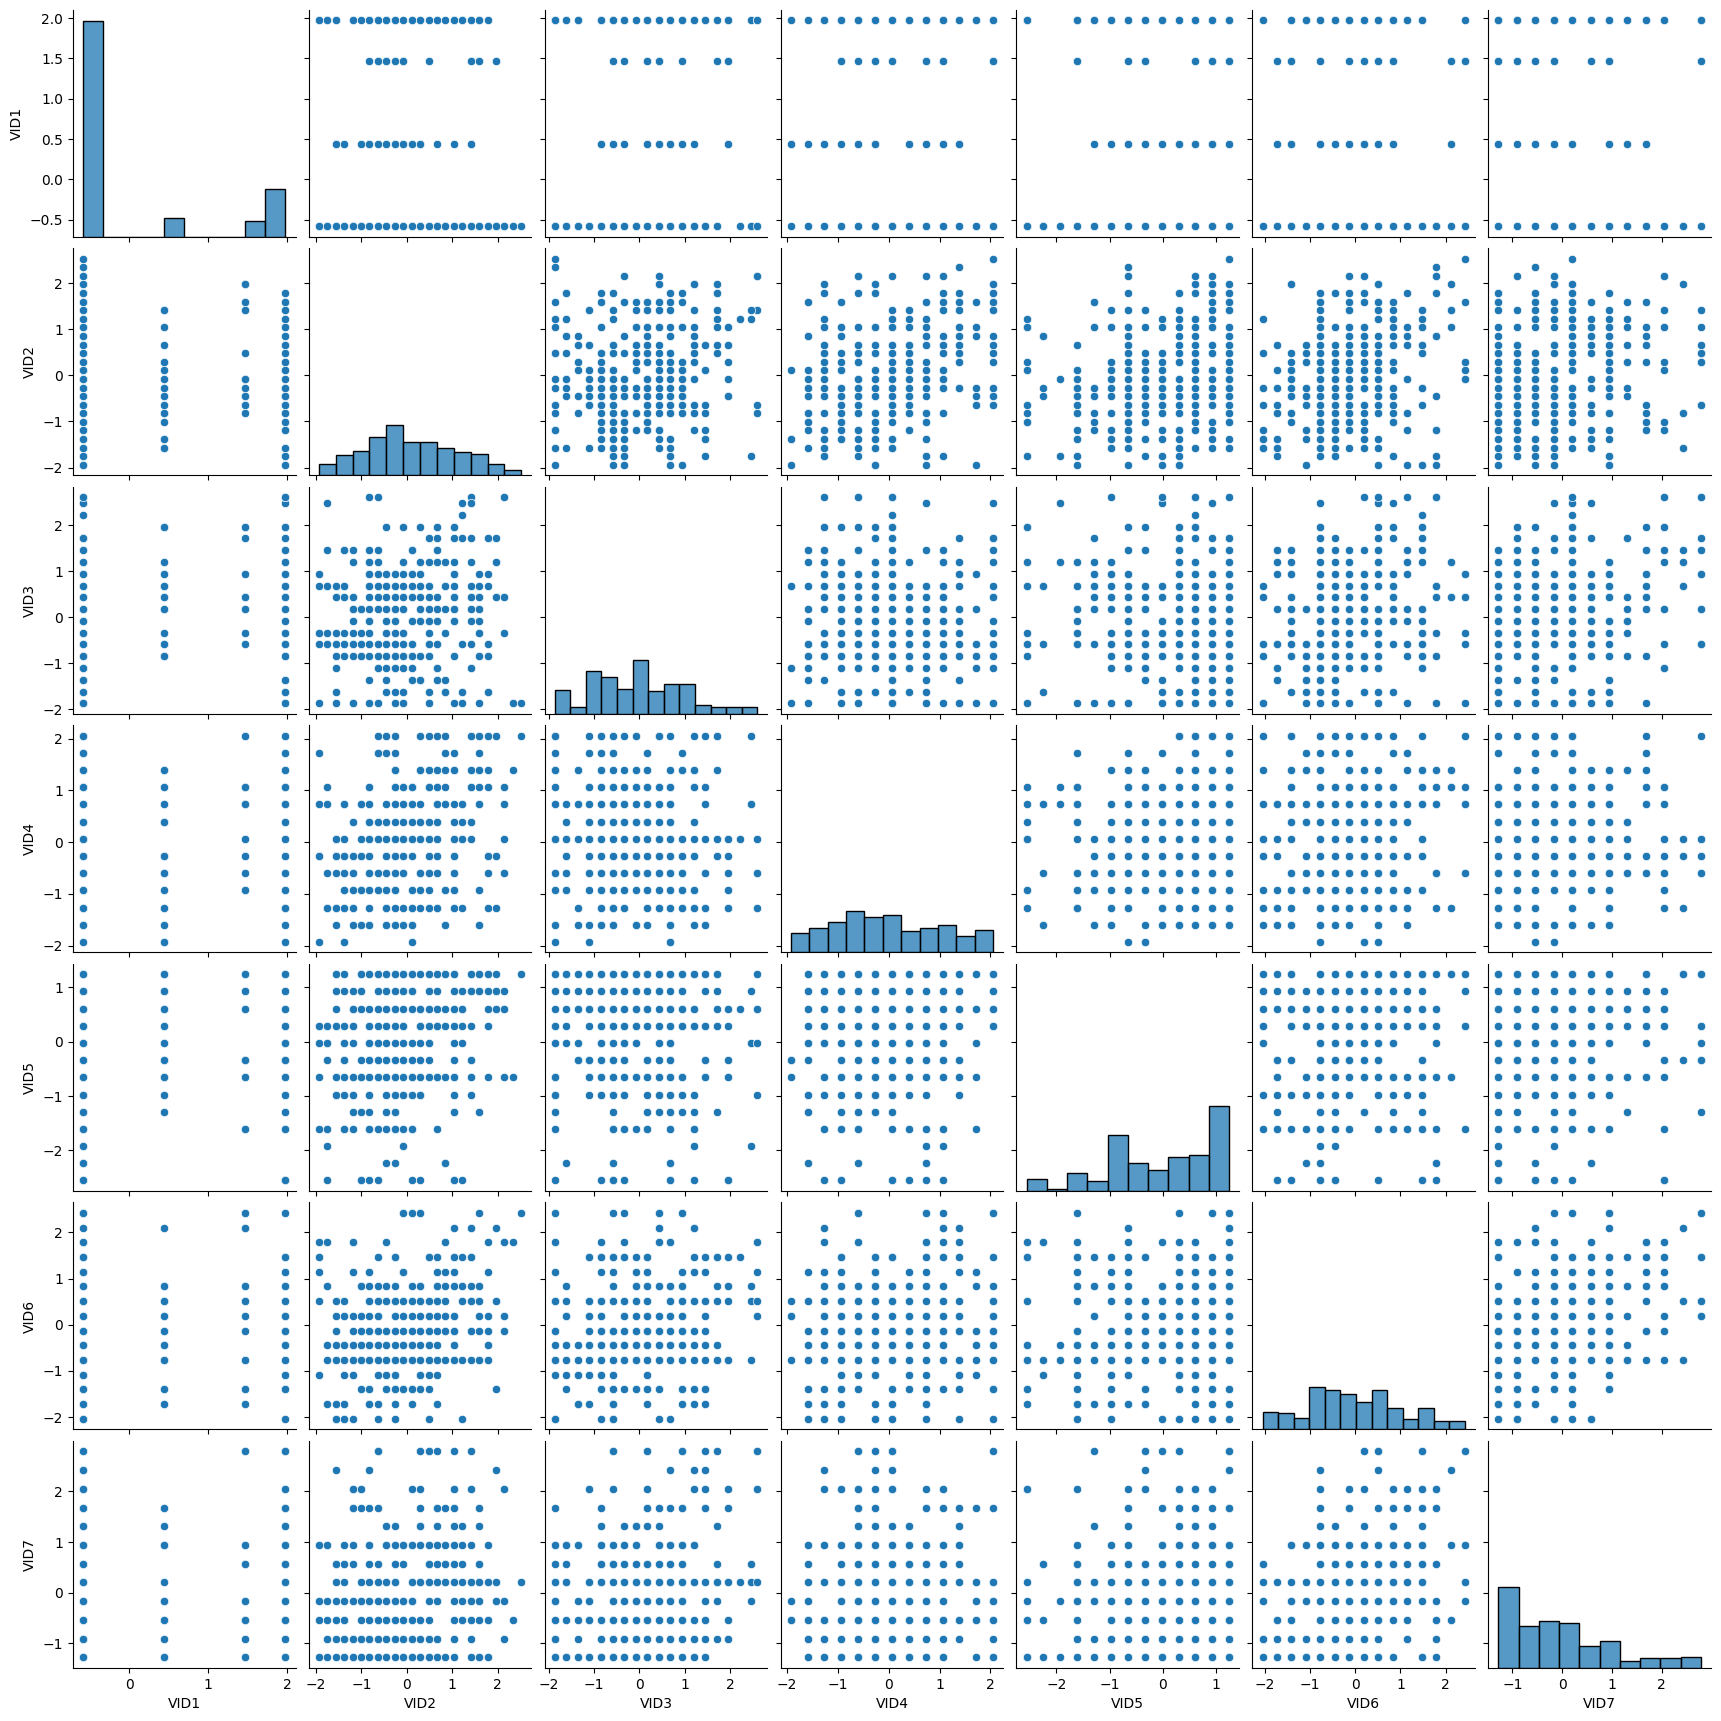

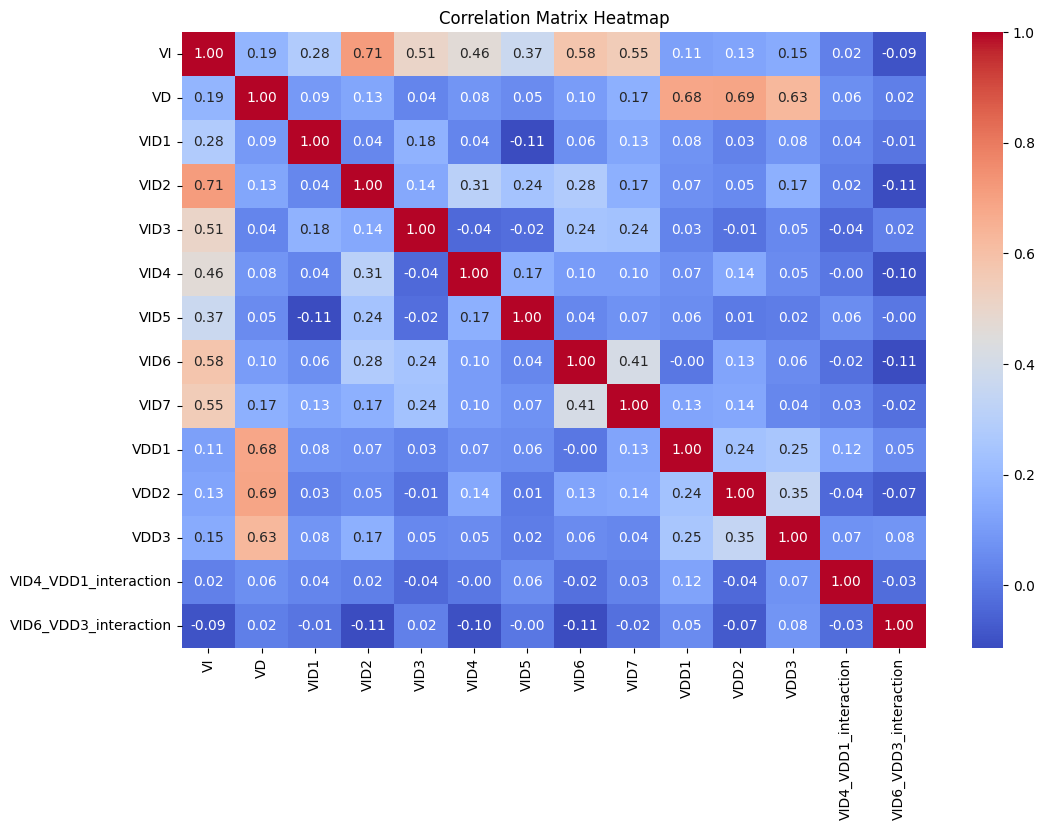

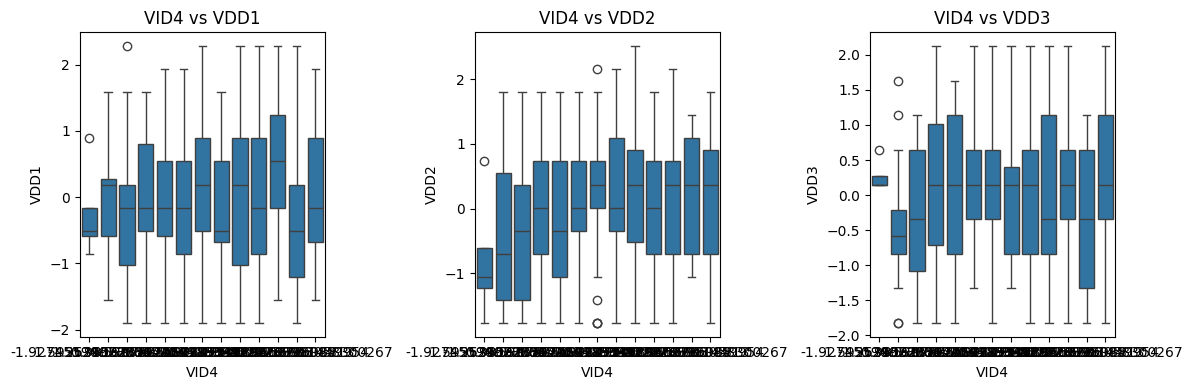

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for independent variables (VID1-VID7)
plt.figure(figsize=(15, 10))
for i, col in enumerate(['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for dependent variables (VDD1-VDD3)
plt.figure(figsize=(8, 6))
for i, col in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['VDD1'], hue=df['VDD1'])
    plt.title(f'{col} vs VDD1')
plt.tight_layout()
plt.show()

# Pair plots for independent variables
sns.pairplot(df[['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']])
plt.show()


# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Box plots comparing distributions across different levels of a key independent variable
plt.figure(figsize=(12, 4))
for i, vdd_col in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1,3, i+1)
    sns.boxplot(x='VID4', y=vdd_col, data=df) #Example: VID4 vs. each VDD
    plt.title(f'VID4 vs {vdd_col}')
plt.tight_layout()
plt.show()

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets as instructed, ensuring the dependent variables are correctly separated.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df.drop(columns=['VDD1', 'VDD2', 'VDD3'])
y = df[['VDD1', 'VDD2', 'VDD3']]

# Split data into training (70%) and temp (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp data into validation (50%) and testing (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (264, 11)
y_train shape: (264, 3)
X_val shape: (57, 11)
y_val shape: (57, 3)
X_test shape: (57, 11)
y_test shape: (57, 3)


## Model training

### Subtask:
Train two machine learning models (Logistic Regression and Random Forest) to predict the professional interests (VDD1, VDD2, VDD3) based on the lifestyle factors (VID1-VID7).


**Reasoning**:
Train the Logistic Regression and Random Forest models, make predictions on the training set and evaluate the accuracy.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the classifiers
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the training set
logreg_train_preds = logreg_model.predict(X_train)
rf_train_preds = rf_model.predict(X_train)

# Evaluate the models
logreg_train_accuracy = accuracy_score(y_train, logreg_train_preds)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)

print(f"Logistic Regression Training Accuracy: {logreg_train_accuracy}")
print(f"Random Forest Training Accuracy: {rf_train_accuracy}")

ValueError: y should be a 1d array, got an array of shape (264, 3) instead.

**Reasoning**:
The error message indicates that the target variable `y_train` should be a 1D array for Logistic Regression.  The current `y_train` is a multi-output target (3 columns). I need to iterate through each target variable column and train a separate model for each, then evaluate each model.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the classifiers
logreg_models = {}
rf_models = {}

# Iterate through each target variable
for col in y_train.columns:
    logreg_models[col] = LogisticRegression(random_state=42)
    rf_models[col] = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the models for the current target variable
    logreg_models[col].fit(X_train, y_train[col])
    rf_models[col].fit(X_train, y_train[col])

    # Make predictions
    logreg_train_preds = logreg_models[col].predict(X_train)
    rf_train_preds = rf_models[col].predict(X_train)

    # Evaluate the model
    logreg_train_accuracy = accuracy_score(y_train[col], logreg_train_preds)
    rf_train_accuracy = accuracy_score(y_train[col], rf_train_preds)

    print(f"Target variable: {col}")
    print(f"Logistic Regression Training Accuracy: {logreg_train_accuracy}")
    print(f"Random Forest Training Accuracy: {rf_train_accuracy}")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

**Reasoning**:
The error "Unknown label type: continuous" suggests that the target variables are continuous, not discrete classes, which are required for classification models like Logistic Regression.  I need to use regression models instead. I will import `LinearRegression` and `RandomForestRegressor` and train them for each target variable.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the regressors
linear_reg_models = {}
rf_reg_models = {}

# Iterate through each target variable
for col in y_train.columns:
    linear_reg_models[col] = LinearRegression()
    rf_reg_models[col] = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the models for the current target variable
    linear_reg_models[col].fit(X_train, y_train[col])
    rf_reg_models[col].fit(X_train, y_train[col])

    # Make predictions
    linear_train_preds = linear_reg_models[col].predict(X_train)
    rf_train_preds = rf_reg_models[col].predict(X_train)

    # Evaluate the model (using Mean Squared Error for regression)
    linear_train_mse = mean_squared_error(y_train[col], linear_train_preds)
    rf_train_mse = mean_squared_error(y_train[col], rf_train_preds)

    print(f"Target variable: {col}")
    print(f"Linear Regression Training MSE: {linear_train_mse}")
    print(f"Random Forest Regression Training MSE: {rf_train_mse}")

Target variable: VDD1
Linear Regression Training MSE: 0.529062359809959
Random Forest Regression Training MSE: 0.04880089384589387
Target variable: VDD2
Linear Regression Training MSE: 0.481602866136729
Random Forest Regression Training MSE: 0.0799109182736048
Target variable: VDD3
Linear Regression Training MSE: 0.5258824766669842
Random Forest Regression Training MSE: 0.04061937615823055


## Model optimization

### Subtask:
Optimize the hyperparameters of the Random Forest Regressor models.


**Reasoning**:
Optimize the hyperparameters of the Random Forest Regressor models using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a scorer object using make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize best estimators dictionary
best_rf_estimators = {}

# Iterate through each target variable
for col in y_val.columns:
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              scoring=scorer,
                              cv=5,
                              n_jobs=-1)

    # Fit the GridSearchCV object
    grid_search.fit(X_val, y_val[col])

    # Extract the best hyperparameters and best estimator
    best_rf_estimators[col] = grid_search.best_estimator_
    print(f"Best hyperparameters for {col}: {grid_search.best_params_}")

Best hyperparameters for VDD1: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best hyperparameters for VDD2: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best hyperparameters for VDD3: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


# Task
Aplica Random Forest Multioutput  para el archivo adjunto para una investigación titulada "Análisis de la Influencia de los estilos de vida sobre el Interés Profesional de los adolescentes". Donde VI es la variable independiente Estilos de Vida, VD es la variable dependiente Interés Profesional, VID1, VID2, VID3, VID4, VID5, VID6 y VID7 son dimensiones de la variable independiente; VDD1, VDD2 VDD3 son dimensiones de la variable dependiente, incluir gráficos y su interpretación. Del archivo adjunto, siendo los títulos de las columnas de la siguiente manera: VI=Estilos de Vida, VD=Interés Profesional, VID1=Consume alcohol y tabaco, VID2=Autocuidado y Cuidado Médico, VID3=Problemas de Sueño, VID4=Actividad Física y Deporte, VID5=Apego a las Reglas, VID6=Comida Procesada, VID7=Comida Chatarra, VDD1=Ciencias de la Salud, VDD2=Ingenierías, VDD3=Ciencias Sociales.

Here is all the data you need:
"EstilosDeVida_InteresProfesional.xlsx"

## Data loading

### Subtask:
Load the data from the Excel file "EstilosDeVida_InteresProfesional.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame and inspect the first few rows and column names.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    display(df.head())
    print(df.columns)
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  VDD2  VDD3
0  59.0  44   5.0    11    10     4    14     9     6    10     9     5
1  82.0  51   8.0    20    20     5     9    13     7     9     9     6
2  87.0  60   5.0    19    10     8    15    15    15     8    12     7
3  70.0  37   5.0    17    18     4    15     6     5     9     6     5
4  73.0  41   5.0    15    13    12     6    15     7     8     7     4

Index(['VI', 'VD', 'VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7',
       'VDD1', 'VDD2', 'VDD3'],
      dtype='object')


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, missing values, descriptive statistics, and correlations between variables.  Visualize the distributions and correlations using appropriate plots.



Shape of the DataFrame: (379, 12)

Missing Values:
 VI      1
VD      0
VID1    1
VID2    0
VID3    0
VID4    0
VID5    0
VID6    0
VID7    0
VDD1    0
VDD2    0
VDD3    0
dtype: int64

Percentage of Missing Values:
 VI      0.263852
VD      0.000000
VID1    0.263852
VID2    0.000000
VID3    0.000000
VID4    0.000000
VID5    0.000000
VID6    0.000000
VID7    0.000000
VDD1    0.000000
VDD2    0.000000
VDD3    0.000000
dtype: float64

Data Types:
 VI      float64
VD        int64
VID1    float64
VID2      int64
VID3      int64
VID4      int64
VID5      int64
VID6      int64
VID7      int64
VDD1      int64
VDD2      int64
VDD3      int64
dtype: object


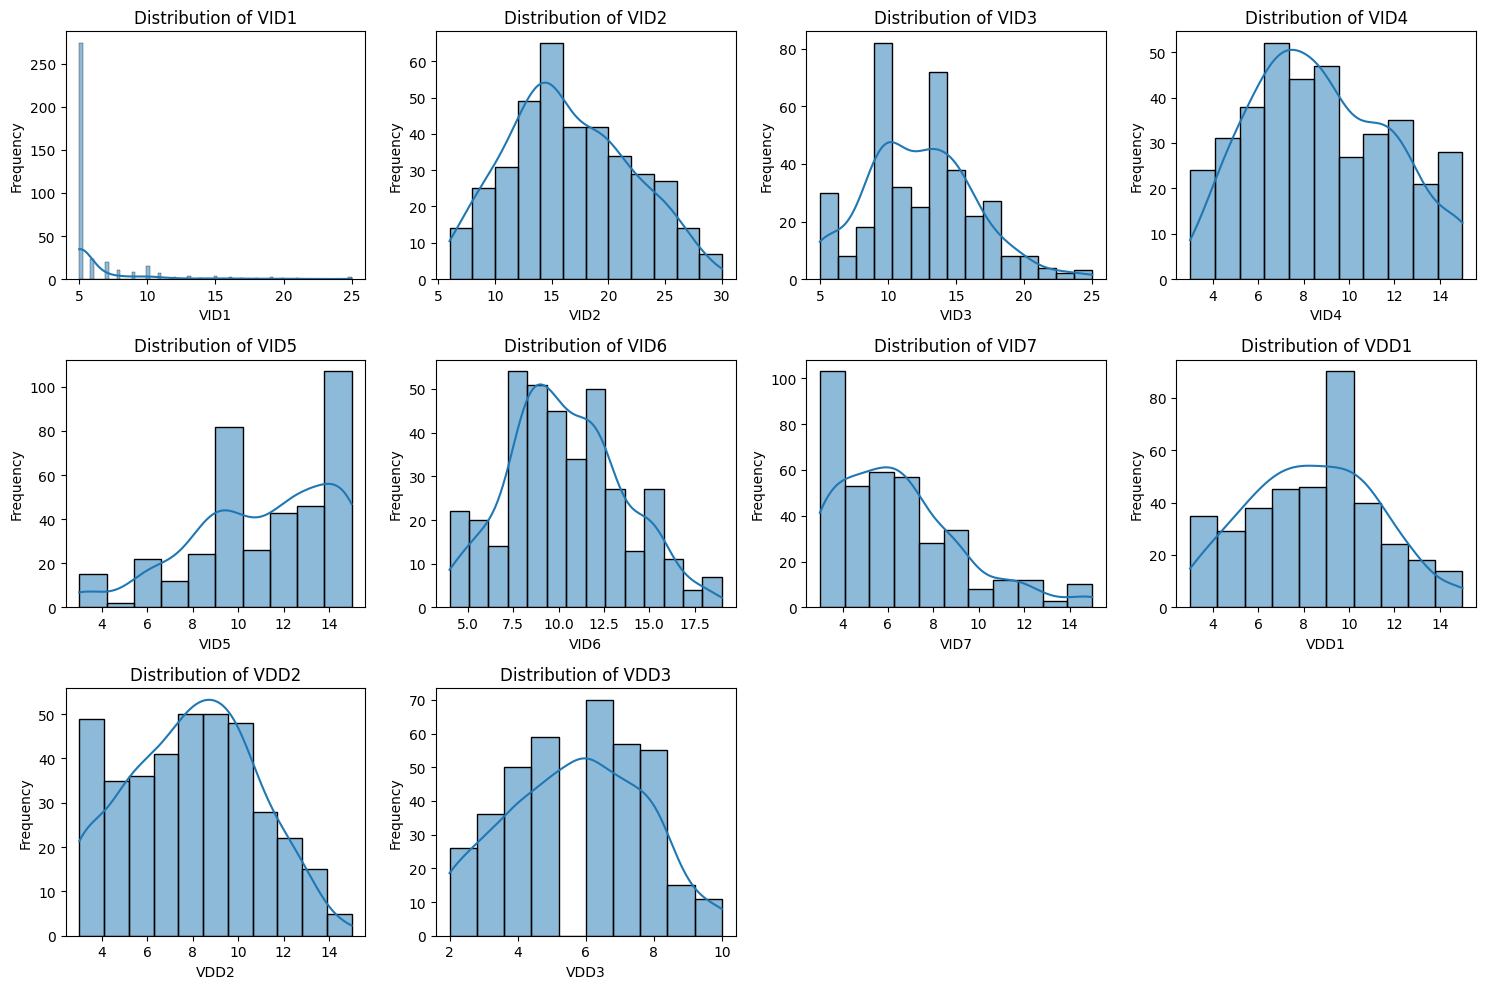

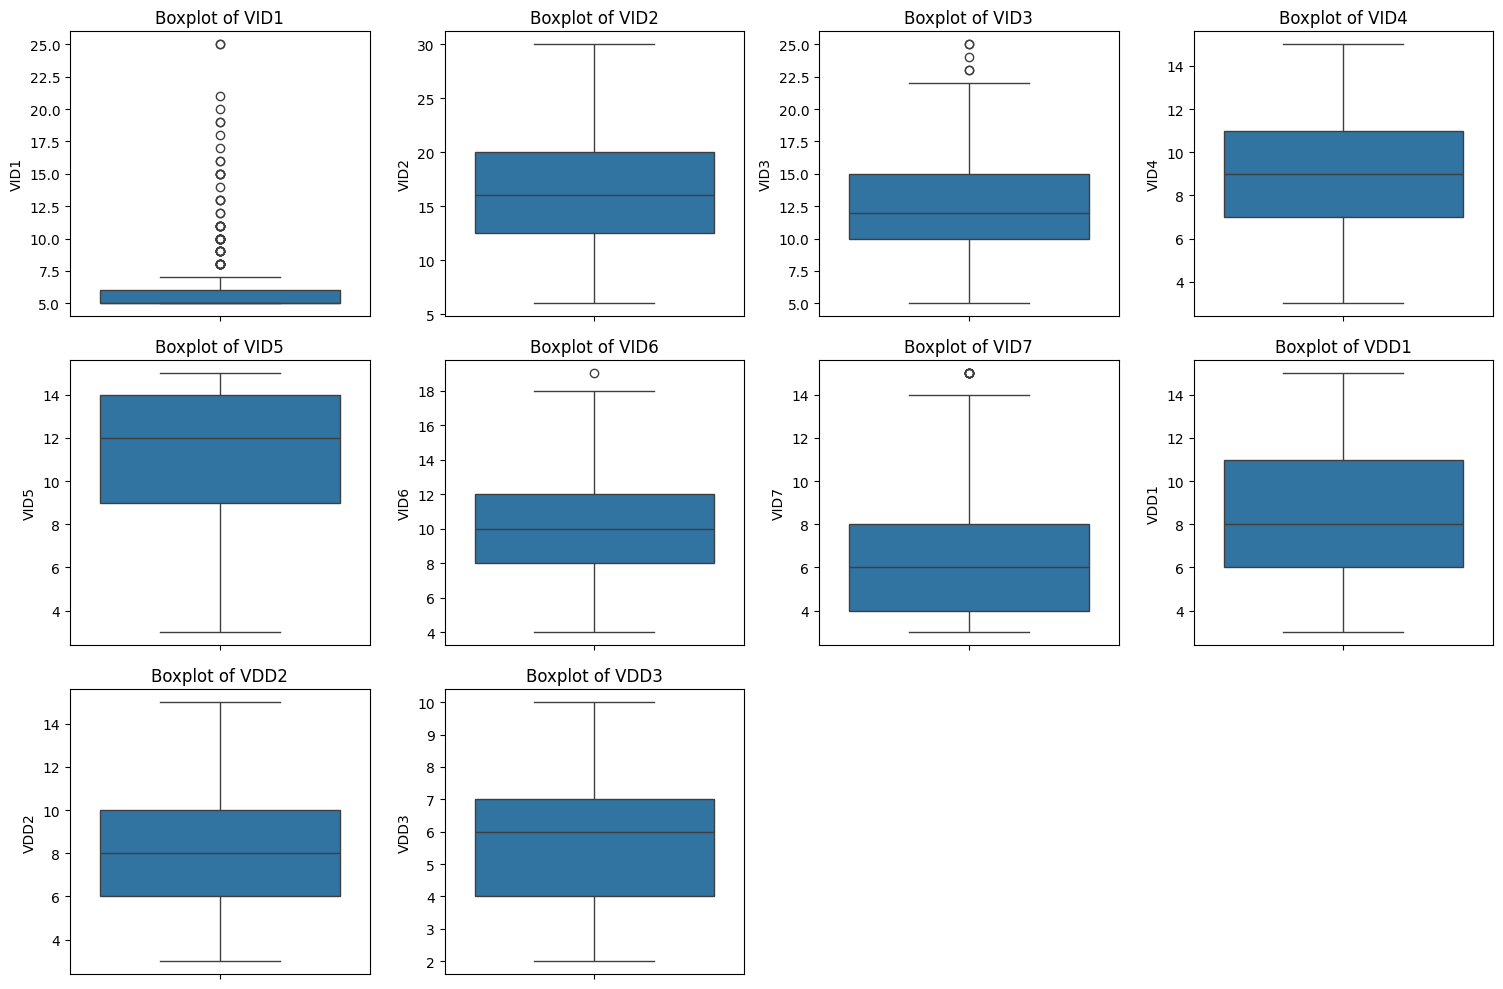


Descriptive Statistics:
              VID1        VID2        VID3        VID4        VID5        VID6  \
count  378.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     6.264550   16.419525   12.332454    8.812665   11.084433   10.401055   
std      2.981617    5.377864    3.970163    3.014822    3.162821    3.140889   
min      5.000000    6.000000    5.000000    3.000000    3.000000    4.000000   
25%      5.000000   12.500000   10.000000    7.000000    9.000000    8.000000   
50%      5.000000   16.000000   12.000000    9.000000   12.000000   10.000000   
75%      6.000000   20.000000   15.000000   11.000000   14.000000   12.000000   
max     25.000000   30.000000   25.000000   15.000000   15.000000   19.000000   

             VID7        VDD1        VDD2        VDD3  
count  379.000000  379.000000  379.000000  379.000000  
mean     6.467018    8.459103    7.949868    5.696570  
std      2.759466    2.873025    2.807797    2.026351  
min      3.000000   

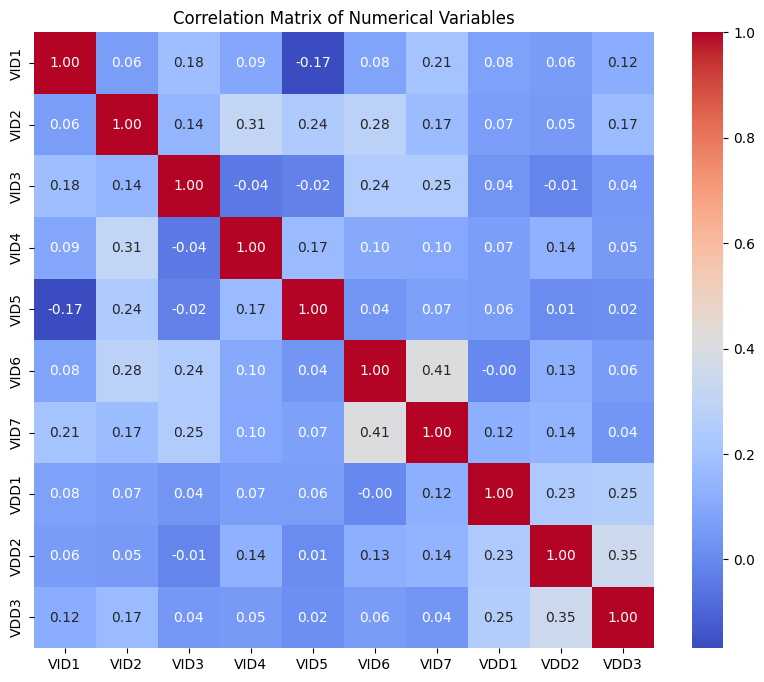


Correlation Matrix:
           VID1      VID2      VID3      VID4      VID5      VID6      VID7  \
VID1  1.000000  0.060053  0.179365  0.092690 -0.168606  0.083615  0.205517   
VID2  0.060053  1.000000  0.141889  0.309822  0.238367  0.282891  0.169309   
VID3  0.179365  0.141889  1.000000 -0.041198 -0.021624  0.242801  0.245861   
VID4  0.092690  0.309822 -0.041198  1.000000  0.167296  0.102385  0.098311   
VID5 -0.168606  0.238367 -0.021624  0.167296  1.000000  0.040256  0.071249   
VID6  0.083615  0.282891  0.242801  0.102385  0.040256  1.000000  0.410847   
VID7  0.205517  0.169309  0.245861  0.098311  0.071249  0.410847  1.000000   
VDD1  0.076697  0.066606  0.035057  0.067987  0.061228 -0.002868  0.123045   
VDD2  0.055846  0.051153 -0.009180  0.136710  0.006138  0.127677  0.138924   
VDD3  0.115501  0.168052  0.043812  0.053895  0.015566  0.055334  0.038657   

          VDD1      VDD2      VDD3  
VID1  0.076697  0.055846  0.115501  
VID2  0.066606  0.051153  0.168052  
VID3  0.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# 3. Data types
print("\nData Types:\n", df.dtypes)

# 4 & 5. Distributions and descriptive statistics
numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics:\n", df[numerical_cols].describe())

# 6. Correlation
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

print("\nCorrelation Matrix:\n", correlation_matrix)

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Handle the missing values in 'VI' and 'VID1' by removing the corresponding rows, since there's only one missing value in each column, and impute outliers in 'VID1' using winsorizing. Then, verify that there are no more missing values and check data consistency.



In [ ]:
# Remove rows with missing values in 'VI' and 'VID1'
df.dropna(subset=['VI', 'VID1'], inplace=True)

# Winsorize 'VID1' at the 1st and 99th percentiles
from scipy.stats.mstats import winsorize
df['VID1'] = winsorize(df['VID1'], limits=[0.01, 0.01])

# Verify no more missing values
print("Missing values after handling:\n", df.isnull().sum())

# Check data consistency (data types and values)
print("\nData types after handling:\n", df.dtypes)
# Further checks for consistency can be added here, e.g., checking for non-numeric values in numerical columns.

Missing values after handling:
 VI      0
VD      0
VID1    0
VID2    0
VID3    0
VID4    0
VID5    0
VID6    0
VID7    0
VDD1    0
VDD2    0
VDD3    0
dtype: int64

Data types after handling:
 VI      float64
VD        int64
VID1    float64
VID2      int64
VID3      int64
VID4      int64
VID5      int64
VID6      int64
VID7      int64
VDD1      int64
VDD2      int64
VDD3      int64
dtype: object


## Feature engineering

### Subtask:
Create interaction terms between the independent variables (VID1-VID7) to capture potential synergistic effects.


**Reasoning**:
Create interaction terms between the independent variables (VID1-VID7) by iterating through all possible pairs and adding them as new columns to the DataFrame.



In [ ]:
import itertools

# Iterate through all possible pairs of independent variables
independent_variables = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
for var1, var2 in itertools.combinations(independent_variables, 2):
    # Create interaction term
    interaction_term = df[var1] * df[var2]
    # Create column name
    column_name = f'{var1}_x_{var2}'
    # Add interaction term to the DataFrame
    df[column_name] = interaction_term

# Add squared terms for each independent variable
for var in independent_variables:
    squared_term = df[var] ** 2
    column_name = f'{var}_squared'
    df[column_name] = squared_term

display(df.head())

VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  ...  VID5_x_VID6  \
0  59.0  44   5.0    11    10     4    14     9     6    10  ...          126   
1  82.0  51   8.0    20    20     5     9    13     7     9  ...          117   
2  87.0  60   5.0    19    10     8    15    15    15     8  ...          225   
3  70.0  37   5.0    17    18     4    15     6     5     9  ...           90   
4  73.0  41   5.0    15    13    12     6    15     7     8  ...           90   

   VID5_x_VID7  VID6_x_VID7  VID1_squared  VID2_squared  VID3_squared  \
0           84           54          25.0           121           100   
1           63           91          64.0           400           400   
2          225          225          25.0           361           100   
3           75           30          25.0           289           324   
4           42          105          25.0           225           169   

   VID4_squared  VID5_squared  VID6_squared  VID7_squared  
0            16           196            81            36  
1            25            81           169            49  
2            64           225           225           225  
3            16           225            36            25  
4           144            36           225            49  

[5 rows x 40 columns]

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split, with features (X) as independent variables and engineered features and target variables (y) as the dependent variables.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df[['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VID1_x_VID2', 'VID1_x_VID3', 'VID1_x_VID4', 'VID1_x_VID5',
        'VID1_x_VID6', 'VID1_x_VID7', 'VID2_x_VID3', 'VID2_x_VID4', 'VID2_x_VID5', 'VID2_x_VID6', 'VID2_x_VID7',
        'VID3_x_VID4', 'VID3_x_VID5', 'VID3_x_VID6', 'VID3_x_VID7', 'VID4_x_VID5', 'VID4_x_VID6', 'VID4_x_VID7',
        'VID5_x_VID6', 'VID5_x_VID7', 'VID6_x_VID7', 'VID1_squared', 'VID2_squared', 'VID3_squared', 'VID4_squared',
        'VID5_squared', 'VID6_squared', 'VID7_squared']]
y = df[['VDD1', 'VDD2', 'VDD3']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
The error indicates that at least one class in the target variable `y` has only one member, preventing stratified splitting.  I'll remove the `stratify` parameter from the `train_test_split` function to resolve this.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df[['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VID1_x_VID2', 'VID1_x_VID3', 'VID1_x_VID4', 'VID1_x_VID5',
        'VID1_x_VID6', 'VID1_x_VID7', 'VID2_x_VID3', 'VID2_x_VID4', 'VID2_x_VID5', 'VID2_x_VID6', 'VID2_x_VID7',
        'VID3_x_VID4', 'VID3_x_VID5', 'VID3_x_VID6', 'VID3_x_VID7', 'VID4_x_VID5', 'VID4_x_VID6', 'VID4_x_VID7',
        'VID5_x_VID6', 'VID5_x_VID7', 'VID6_x_VID7', 'VID1_squared', 'VID2_squared', 'VID3_squared', 'VID4_squared',
        'VID5_squared', 'VID6_squared', 'VID7_squared']]
y = df[['VDD1', 'VDD2', 'VDD3']]

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (302, 35)
y_train shape: (302, 3)
X_test shape: (76, 35)
y_test shape: (76, 3)


## Model training

### Subtask:
Train a Random Forest MultiOutputRegressor model.


**Reasoning**:
Train a Random Forest MultiOutputRegressor model using the training data.



In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Wrap the regressor in a MultiOutputRegressor
model = MultiOutputRegressor(rf_regressor)

# Train the model
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained Random Forest MultiOutputRegressor model.


**Reasoning**:
Import necessary libraries for hyperparameter tuning and define the hyperparameter grid.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2']
}

**Reasoning**:
Initialize GridSearchCV, fit it to the training data, and print the best hyperparameters and score.



In [ ]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Store the best estimator
best_model = grid_search.best_estimator_

Best hyperparameters: {'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}
Best score: -7.418863148414928


## Model evaluation

### Subtask:
Evaluate the performance of the best_model on the test set (X_test, y_test).


**Reasoning**:
Evaluate the performance of the best_model on the test set (X_test, y_test) by calculating R-squared, MAE, and RMSE for each target variable and overall.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics for each target variable
r2_vdd1 = r2_score(y_test['VDD1'], y_pred[:, 0])
mae_vdd1 = mean_absolute_error(y_test['VDD1'], y_pred[:, 0])
rmse_vdd1 = np.sqrt(mean_squared_error(y_test['VDD1'], y_pred[:, 0]))

r2_vdd2 = r2_score(y_test['VDD2'], y_pred[:, 1])
mae_vdd2 = mean_absolute_error(y_test['VDD2'], y_pred[:, 1])
rmse_vdd2 = np.sqrt(mean_squared_error(y_test['VDD2'], y_pred[:, 1]))

r2_vdd3 = r2_score(y_test['VDD3'], y_pred[:, 2])
mae_vdd3 = mean_absolute_error(y_test['VDD3'], y_pred[:, 2])
rmse_vdd3 = np.sqrt(mean_squared_error(y_test['VDD3'], y_pred[:, 2]))

# Calculate overall metrics
r2_overall = r2_score(y_test, y_pred)
mae_overall = mean_absolute_error(y_test, y_pred)
rmse_overall = np.sqrt(mean_squared_error(y_test, y_pred))

# Print metrics
print("R-squared for VDD1:", r2_vdd1)
print("MAE for VDD1:", mae_vdd1)
print("RMSE for VDD1:", rmse_vdd1)

print("\nR-squared for VDD2:", r2_vdd2)
print("MAE for VDD2:", mae_vdd2)
print("RMSE for VDD2:", rmse_vdd2)

print("\nR-squared for VDD3:", r2_vdd3)
print("MAE for VDD3:", mae_vdd3)
print("RMSE for VDD3:", rmse_vdd3)

print("\nOverall R-squared:", r2_overall)
print("Overall MAE:", mae_overall)
print("Overall RMSE:", rmse_overall)

# Store metrics in a dictionary
evaluation_metrics = {
    'VDD1': {'R-squared': r2_vdd1, 'MAE': mae_vdd1, 'RMSE': rmse_vdd1},
    'VDD2': {'R-squared': r2_vdd2, 'MAE': mae_vdd2, 'RMSE': rmse_vdd2},
    'VDD3': {'R-squared': r2_vdd3, 'MAE': mae_vdd3, 'RMSE': rmse_vdd3},
    'Overall': {'R-squared': r2_overall, 'MAE': mae_overall, 'RMSE': rmse_overall}
}

print("\nEvaluation Metrics:", evaluation_metrics)

R-squared for VDD1: -0.035858552027097534
MAE for VDD1: 2.4094205395712986
RMSE for VDD1: 2.9691005364838383

R-squared for VDD2: -0.09085853170132707
MAE for VDD2: 2.5370419747527757
RMSE for VDD2: 2.9424367713143496

R-squared for VDD3: -0.06410470175012595
MAE for VDD3: 1.8003207008175075
RMSE for VDD3: 2.159784596394813

Overall R-squared: -0.06360726182618352
Overall MAE: 2.248927738380527
Overall RMSE: 2.7165027548765552

Evaluation Metrics: {'VDD1': {'R-squared': -0.035858552027097534, 'MAE': 2.4094205395712986, 'RMSE': np.float64(2.9691005364838383)}, 'VDD2': {'R-squared': -0.09085853170132707, 'MAE': 2.5370419747527757, 'RMSE': np.float64(2.9424367713143496)}, 'VDD3': {'R-squared': -0.06410470175012595, 'MAE': 1.8003207008175075, 'RMSE': np.float64(2.159784596394813)}, 'Overall': {'R-squared': -0.06360726182618352, 'MAE': 2.248927738380527, 'RMSE': np.float64(2.7165027548765552)}}


## Data visualization

### Subtask:
Visualize the model's performance and feature importance.


**Reasoning**:
Visualize the model's performance and feature importance using the provided data and the trained model.



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

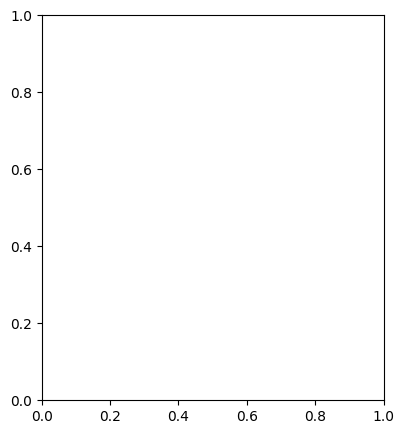

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature Importance
feature_importances = best_model.estimators_[0].feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(15, 5))
for i, target_name in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1, 3, i + 1)
    plt.bar(feature_names, feature_importances[i,:])
    plt.xticks(rotation=90)
    plt.title(f'Feature Importance for {target_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
plt.show()

# Model Predictions vs. Actual Values
plt.figure(figsize=(15, 5))
for i, target_name in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_pred[:, i], y_test[target_name], alpha=0.5)
    plt.plot([min(y_pred[:, i]), max(y_pred[:, i])], [min(y_pred[:, i]), max(y_pred[:, i])], color='red', linestyle='--')
    plt.title(f'Predicted vs. Actual for {target_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
plt.tight_layout()
plt.show()

# Residual Plots
plt.figure(figsize=(15, 5))
for i, target_name in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1, 3, i+1)
    residuals = y_test[target_name] - y_pred[:, i]
    sns.residplot(x=y_pred[:, i], y=residuals, lowess=True, color="g")
    plt.title(f"Residual Plot for {target_name}")
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Relationships between independent and dependent variables
plt.figure(figsize=(20, 10))
independent_variables = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
dependent_variables = ['VDD1', 'VDD2', 'VDD3']
colors = ['red', 'green', 'blue']
for i, independent_var in enumerate(independent_variables):
    plt.subplot(2,4, i + 1)
    for j, dependent_var in enumerate(dependent_variables):
        sns.regplot(x=df[independent_var], y=df[dependent_var], color=colors[j], label=dependent_var, scatter_kws={'alpha':0.5})
    plt.title(f'Relationship between {independent_var} and Dependent Variables')
    plt.xlabel(independent_var)
    plt.ylabel('Dependent Variables')
    plt.legend()
plt.tight_layout()
plt.show()

**Reasoning**:
The error `IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed` occurs because `feature_importances` is a 1D array, but the code tries to access it as a 2D array using `feature_importances[i,:]`.  The code should access the feature importances directly without indexing the second dimension. Also, the plots were not correctly generated. The code below fixes the feature importance plotting and regenerates all the plots with a better layout.



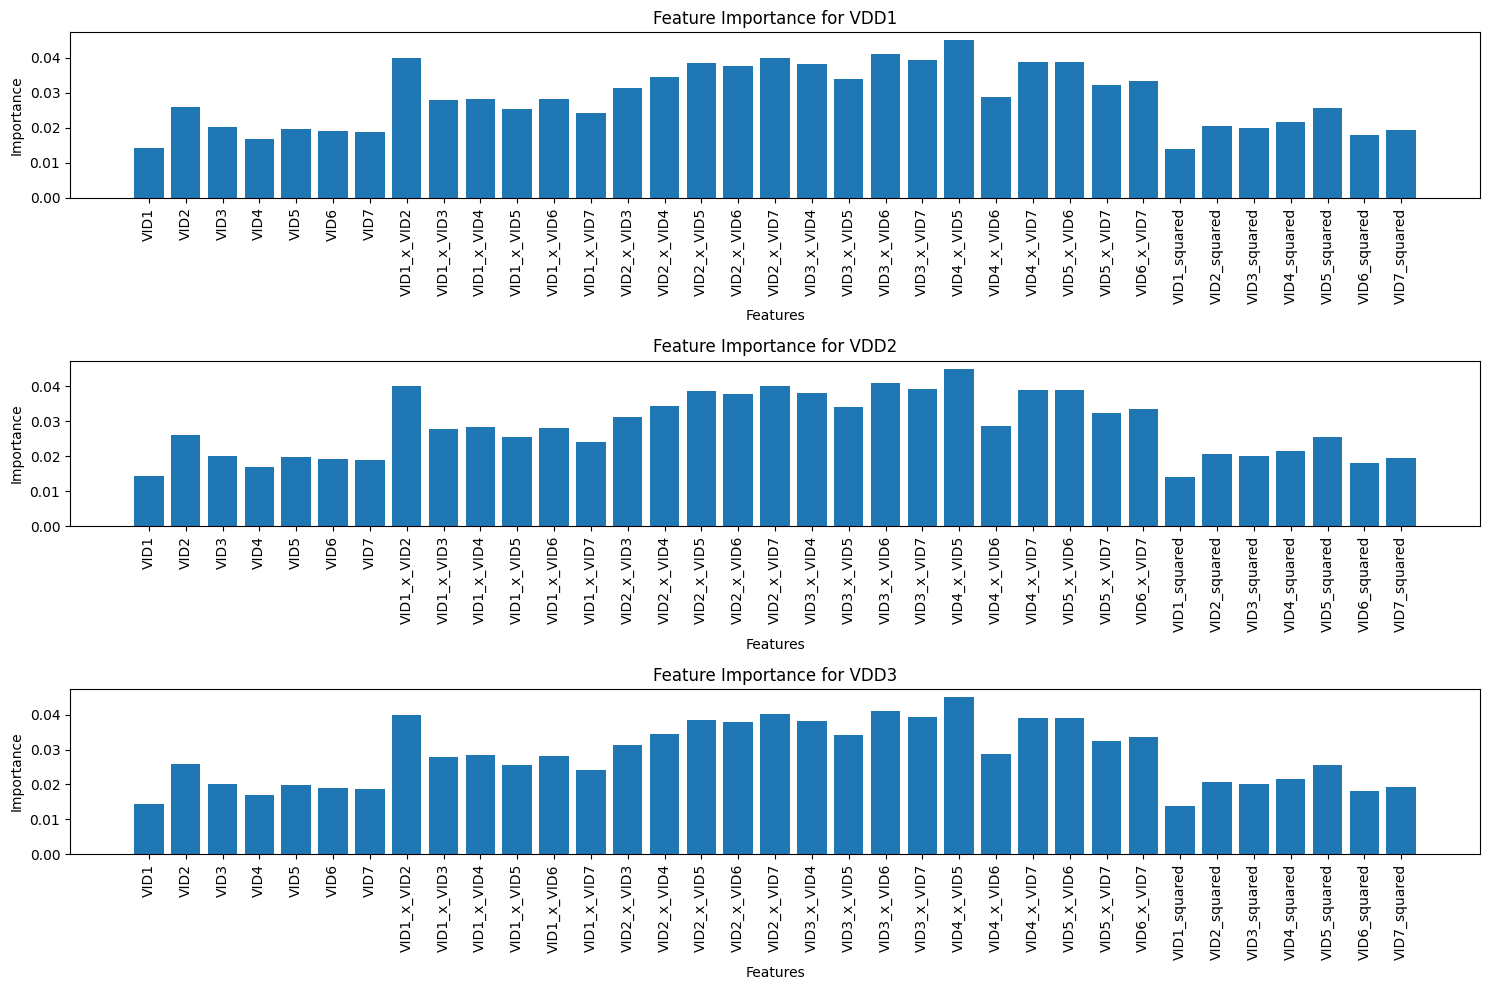

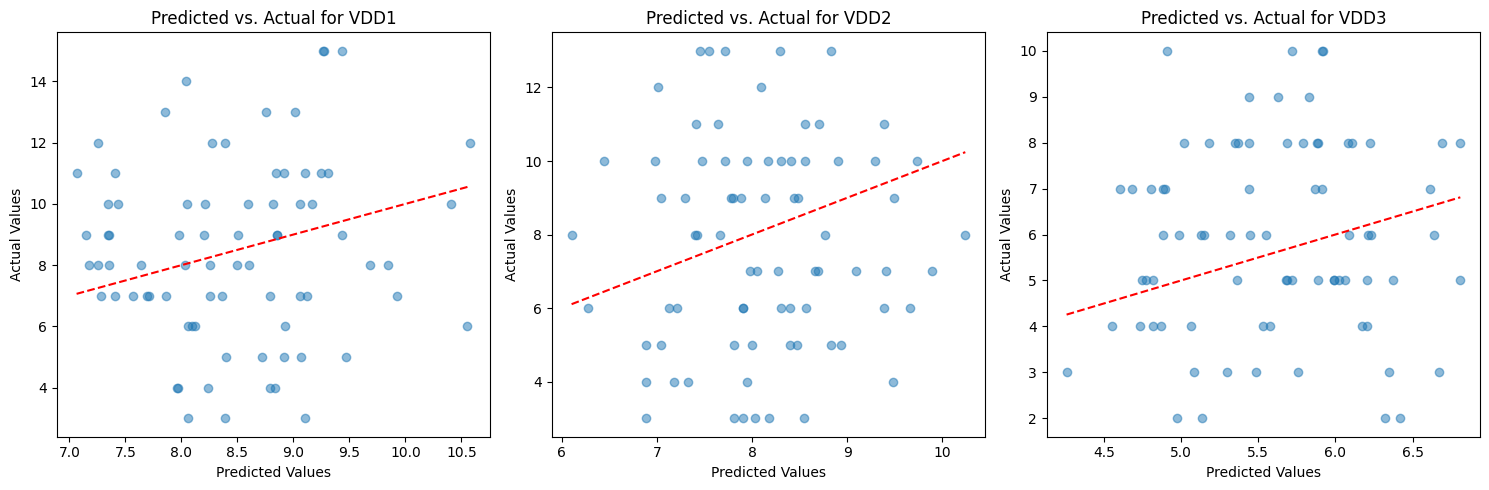

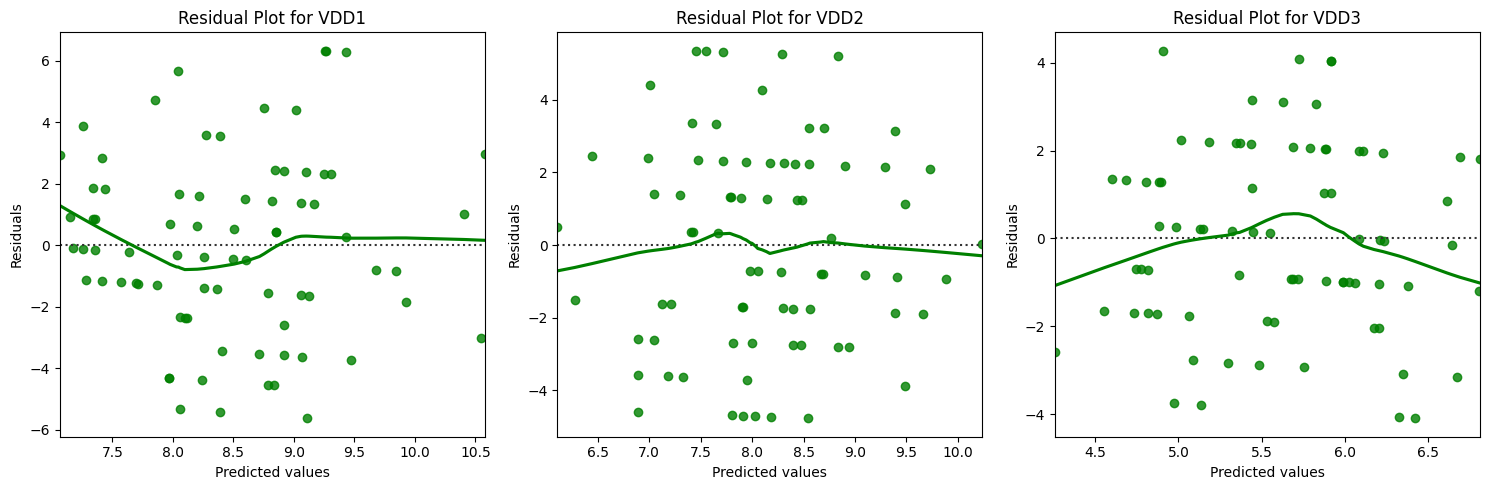

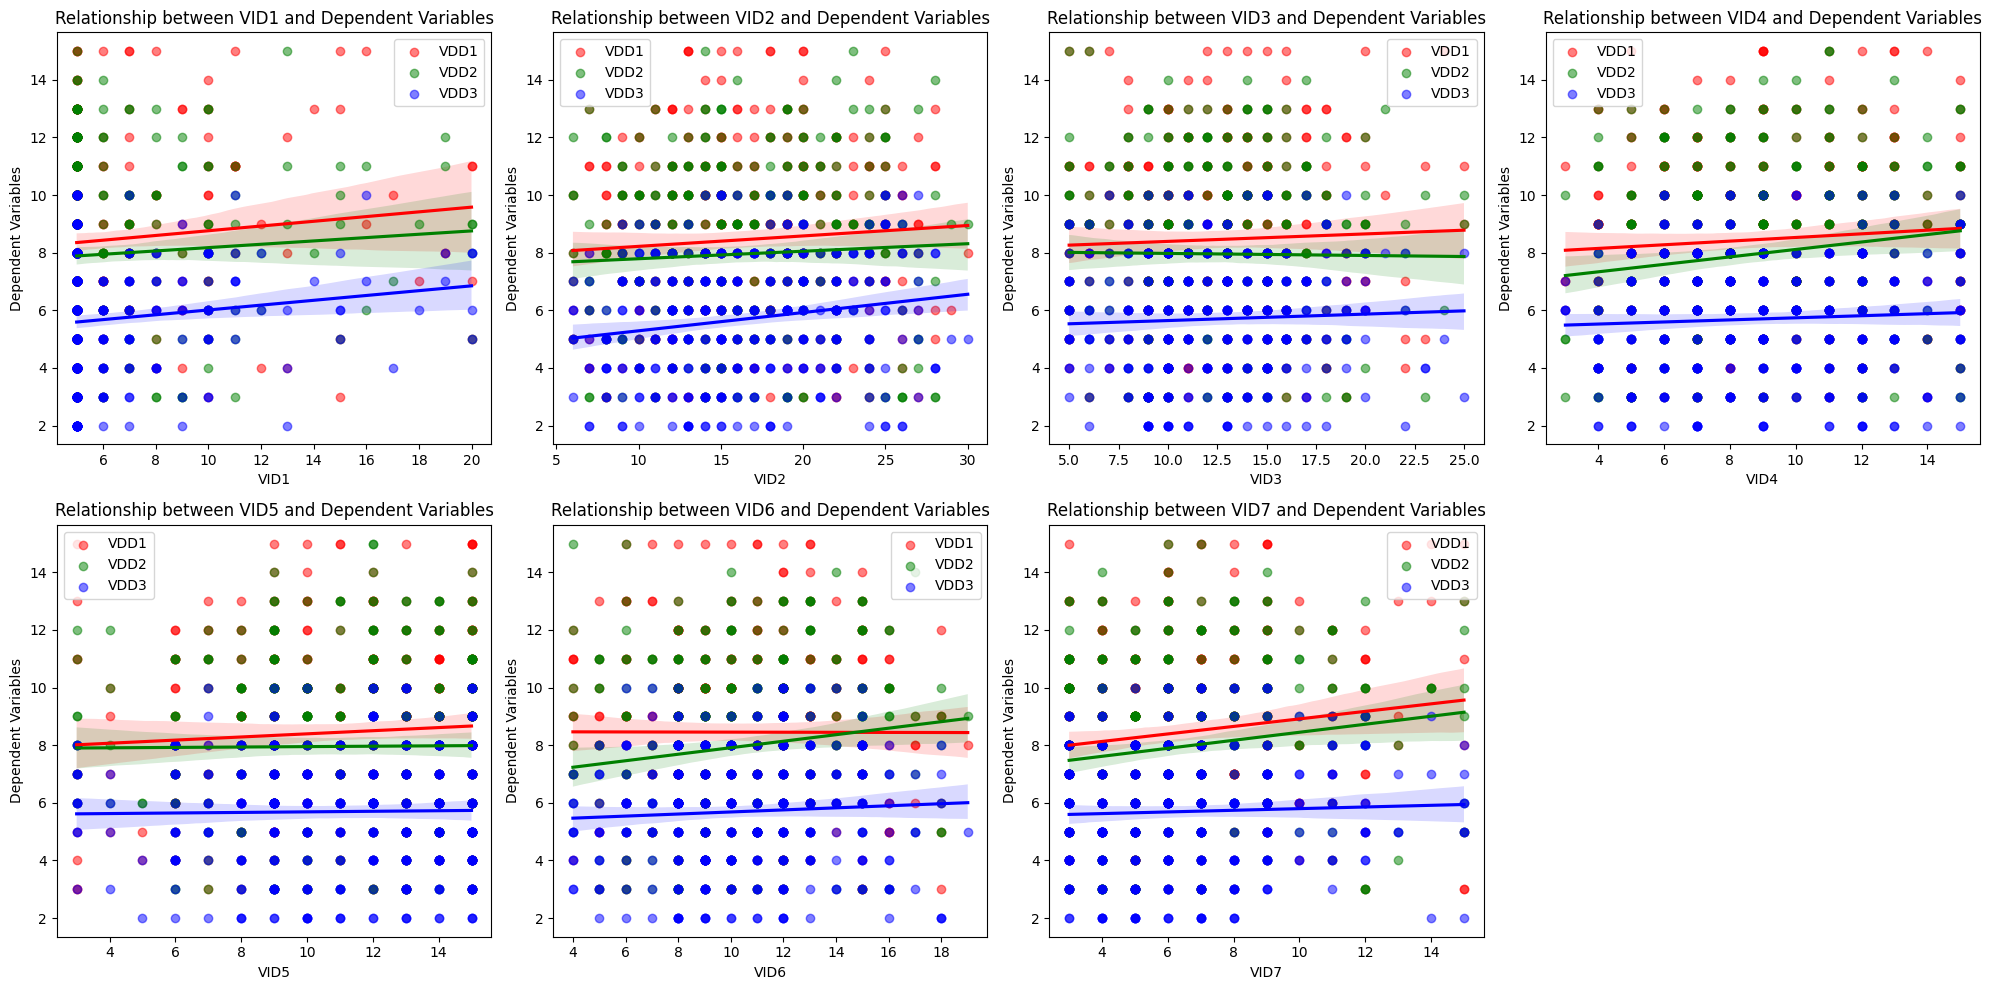

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature Importance
feature_importances = best_model.estimators_[0].feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(15, 10))
for i, target_name in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(3, 1, i + 1)
    plt.bar(feature_names, feature_importances)
    plt.xticks(rotation=90)
    plt.title(f'Feature Importance for {target_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
plt.show()


# Model Predictions vs. Actual Values
plt.figure(figsize=(15, 5))
for i, target_name in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_pred[:, i], y_test[target_name], alpha=0.5)
    plt.plot([min(y_pred[:, i]), max(y_pred[:, i])], [min(y_pred[:, i]), max(y_pred[:, i])], color='red', linestyle='--')
    plt.title(f'Predicted vs. Actual for {target_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
plt.tight_layout()
plt.show()


# Residual Plots
plt.figure(figsize=(15, 5))
for i, target_name in enumerate(['VDD1', 'VDD2', 'VDD3']):
    plt.subplot(1, 3, i+1)
    residuals = y_test[target_name] - y_pred[:, i]
    sns.residplot(x=y_pred[:, i], y=residuals, lowess=True, color="g")
    plt.title(f"Residual Plot for {target_name}")
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Relationships between independent and dependent variables
plt.figure(figsize=(20, 10))
independent_variables = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
dependent_variables = ['VDD1', 'VDD2', 'VDD3']
colors = ['red', 'green', 'blue']
for i, independent_var in enumerate(independent_variables):
    plt.subplot(2,4, i + 1)
    for j, dependent_var in enumerate(dependent_variables):
        sns.regplot(x=df[independent_var], y=df[dependent_var], color=colors[j], label=dependent_var, scatter_kws={'alpha':0.5})
    plt.title(f'Relationship between {independent_var} and Dependent Variables')
    plt.xlabel(independent_var)
    plt.ylabel('Dependent Variables')
    plt.legend()
plt.tight_layout()
plt.show()

VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  VDD2  VDD3
0  59.0  44   5.0    11    10     4    14     9     6    10     9     5
1  82.0  51   8.0    20    20     5     9    13     7     9     9     6
2  87.0  60   5.0    19    10     8    15    15    15     8    12     7
3  70.0  37   5.0    17    18     4    15     6     5     9     6     5
4  73.0  41   5.0    15    13    12     6    15     7     8     7     4

Index(['VI', 'VD', 'VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7',
       'VDD1', 'VDD2', 'VDD3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VI      378 non-null    float64
 1   VD      379 non-null    int64  
 2   VID1    378 non-null    float64
 3   VID2    379 non-null    int64  
 4   VID3    379 non-null    int64  
 5   VID4    379 non-null    int64  
 6   VID5    379 non-null    int64  
 7   VID6    379 non-null    int64  
 8   VID7    379 non-null    int64  
 9   VDD1    379 non-null    int64  
 10  VDD2    379 non-null    int64  
 11  VDD3    379 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 35.7 KB
None
Data Types:
 VI      float64
VD        int64
VID1    float64
VID2      int64
VID3      int64
VID4      int64
VID5      int64
VID6      int64
VID7      int64
VDD1      int64
VDD2      int64
VD

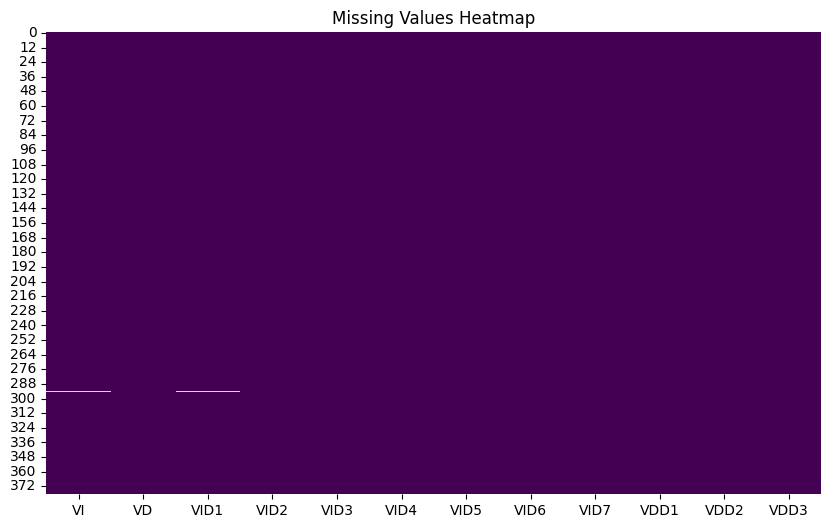

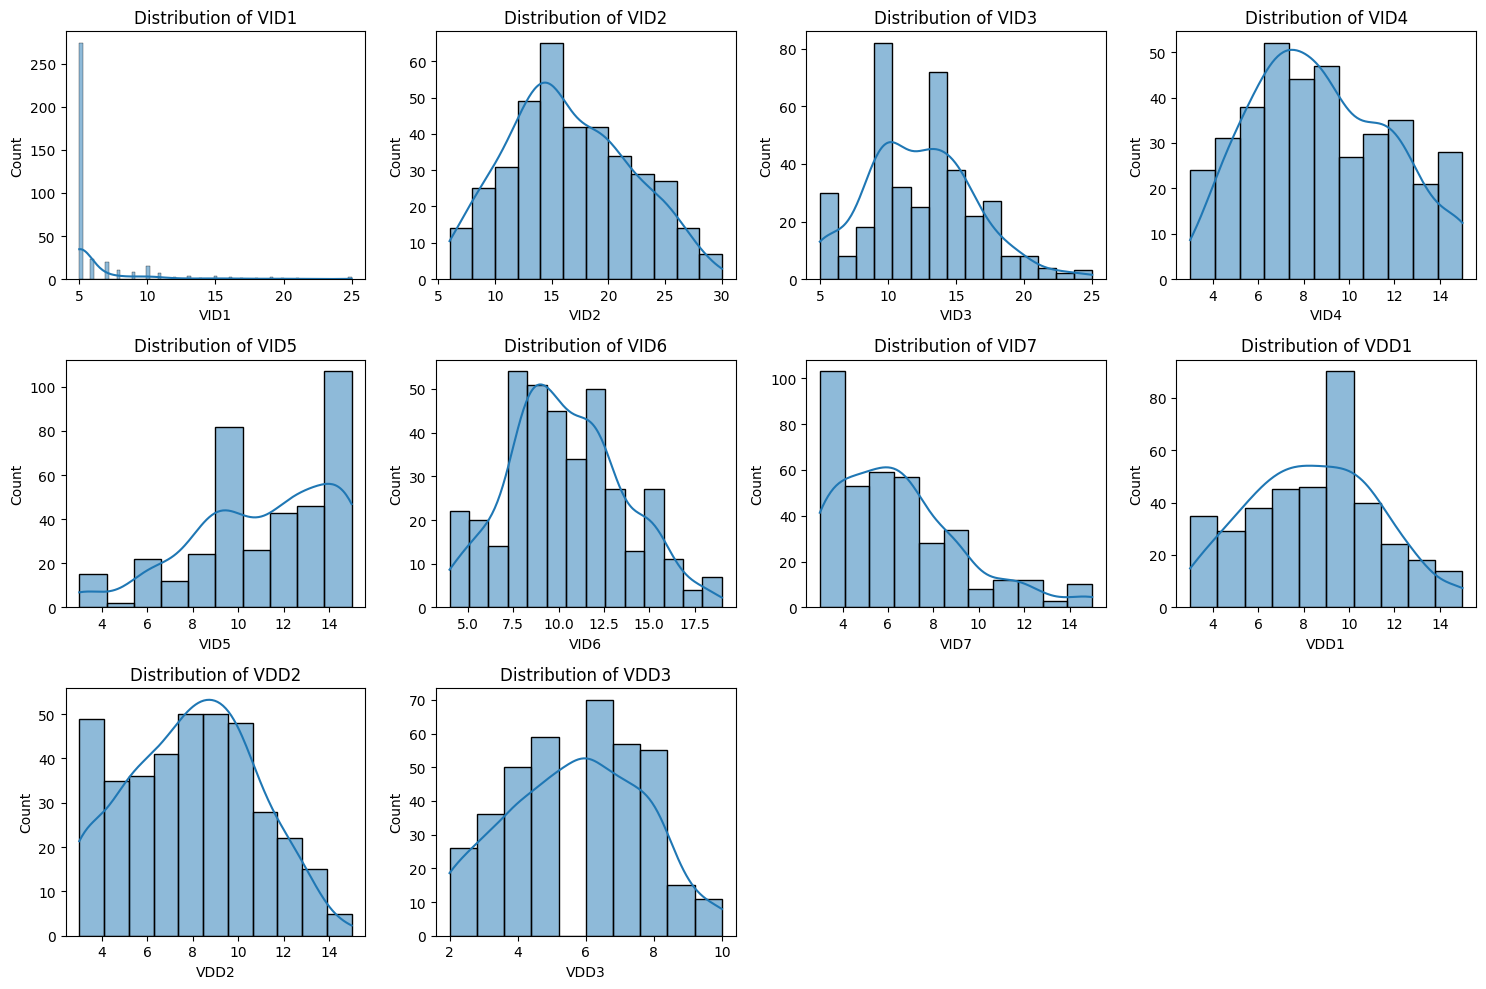

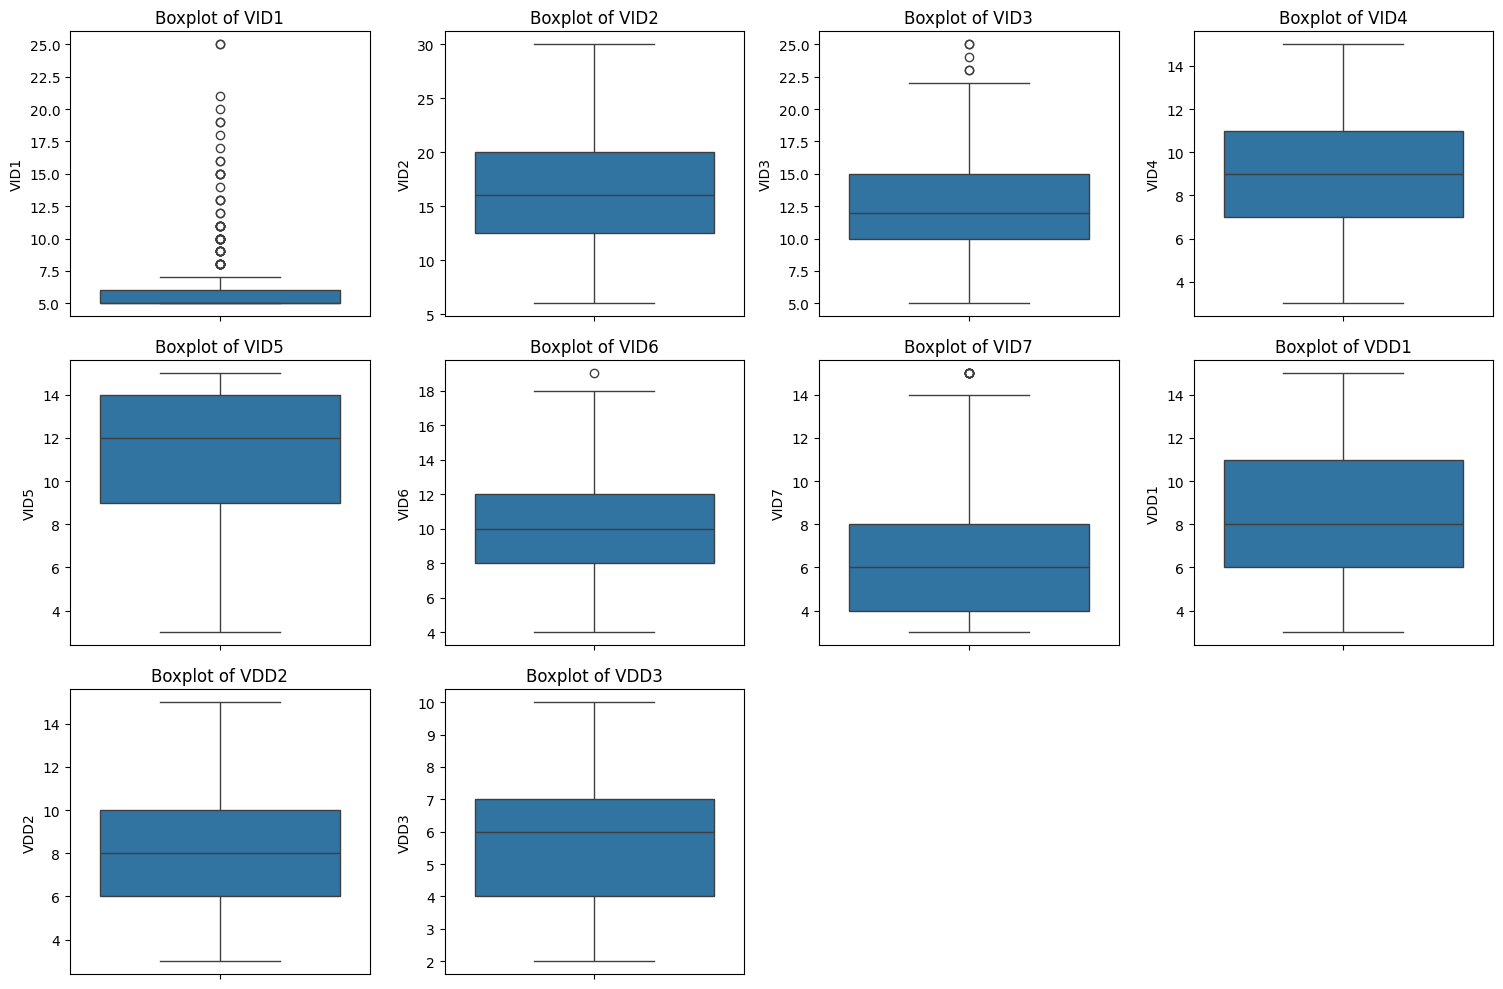


Descriptive Statistics:
                VI          VD        VID1        VID2        VID3        VID4  \
count  378.000000  379.000000  378.000000  379.000000  379.000000  379.000000   
mean    71.791005   46.150396    6.264550   16.419525   12.332454    8.812665   
std     12.835677   11.209693    2.981617    5.377864    3.970163    3.014822   
min     44.000000   19.000000    5.000000    6.000000    5.000000    3.000000   
25%     63.250000   38.000000    5.000000   12.500000   10.000000    7.000000   
50%     70.000000   46.000000    5.000000   16.000000   12.000000    9.000000   
75%     79.000000   54.000000    6.000000   20.000000   15.000000   11.000000   
max    120.000000   81.000000   25.000000   30.000000   25.000000   15.000000   

             VID5        VID6        VID7        VDD1        VDD2        VDD3  
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000  
mean    11.084433   10.401055    6.467018    8.459103    7.949868    5.696570  
std 

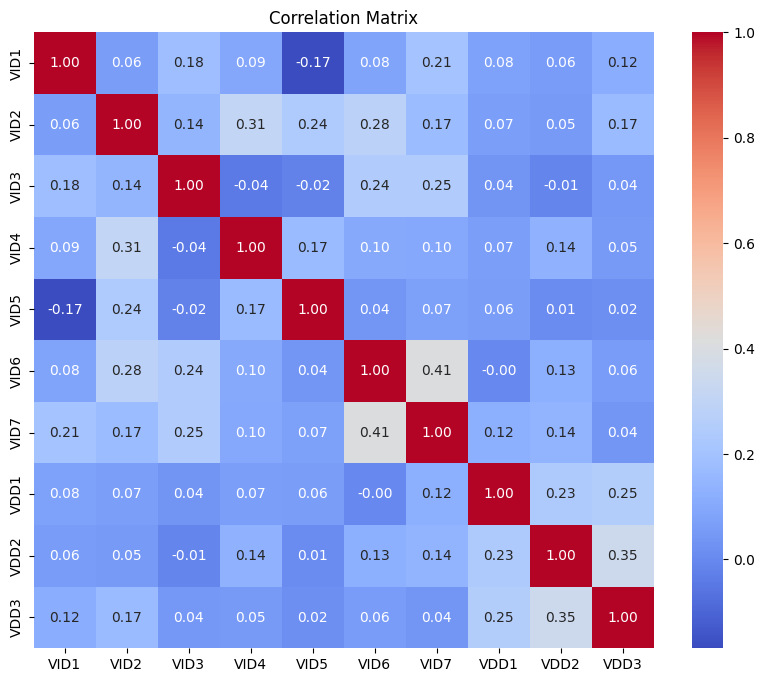

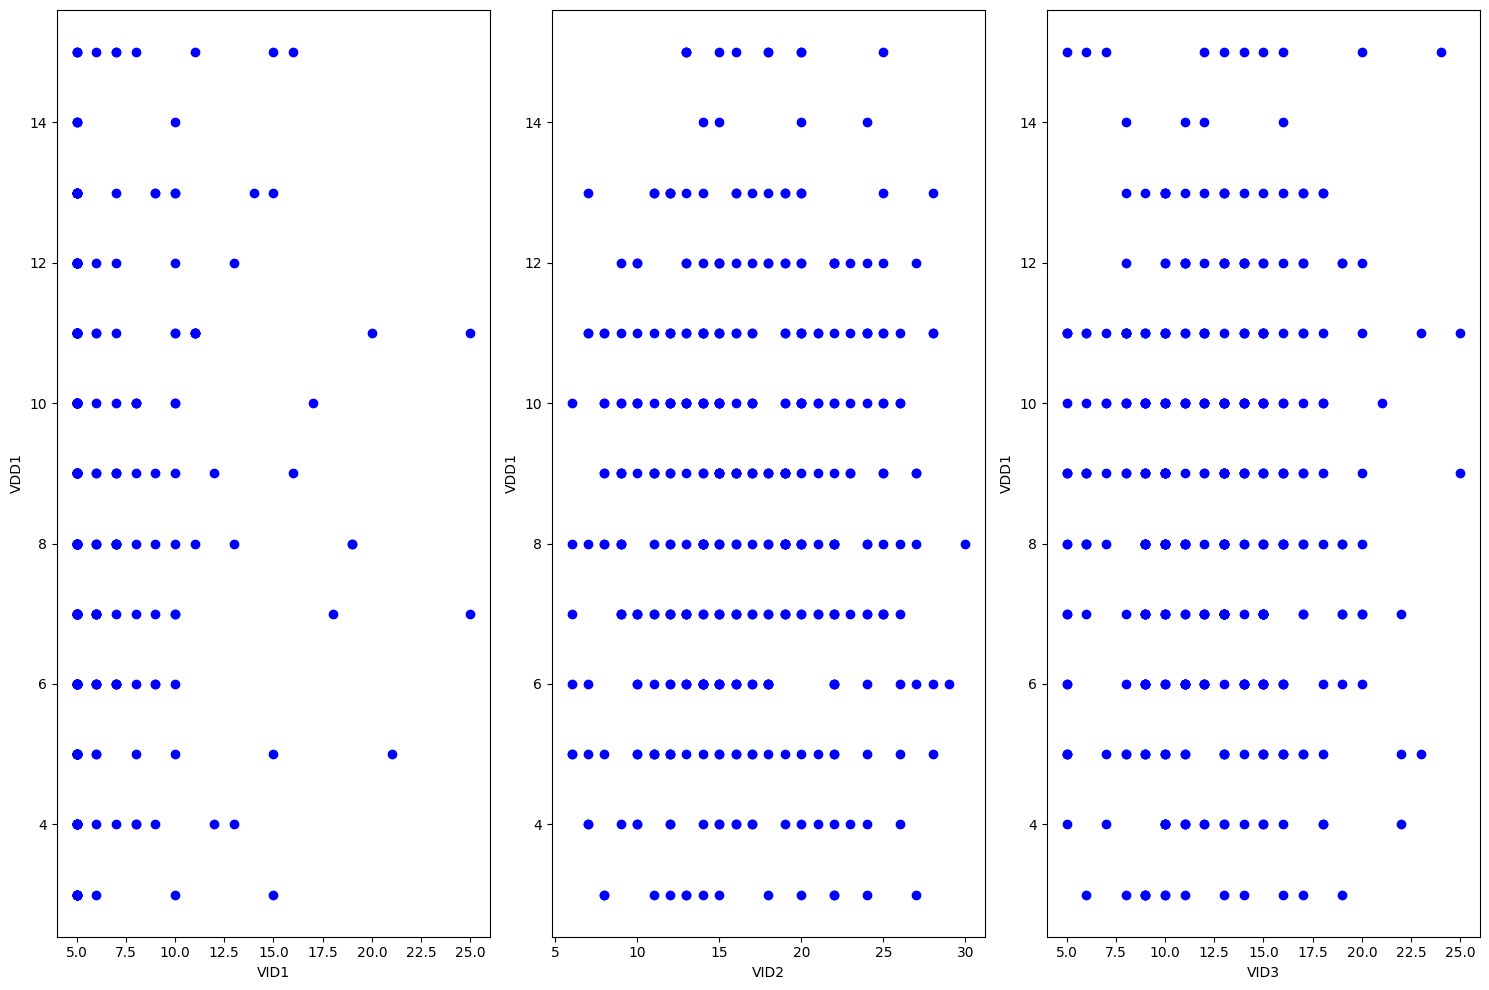


Data Shape: (379, 12)


In [ ]:
# Data loading
import pandas as pd

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    display(df.head())
    print(df.columns)
    print(df.info())
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None #Set df to None to indicate an error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None #Set df to None to indicate an error

# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # 1. Examine data types
    print("Data Types:\n", df.dtypes)

    # 2. Check for missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print("\nMissing Values:\n", missing_values)
    print("\nMissing Value Percentage:\n", missing_percentage)

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

    # 3. Analyze distributions
    numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(3, 4, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


    # 4. Descriptive statistics
    print("\nDescriptive Statistics:\n", df.describe())
    categorical_cols = ['VI', 'VD'] # Assuming 'VI' and 'VD' are categorical
    for col in categorical_cols:
        print(f"\nFrequencies and Proportions for {col}:\n", df[col].value_counts(normalize=True))


    # 5. Investigate correlations
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Scatter plots for selected correlations
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols[:3]): # Example for the first 3 numerical columns
        plt.subplot(1,3, i + 1)
        plt.scatter(df[col], df['VDD1'], color = 'blue')
        plt.xlabel(col)
        plt.ylabel('VDD1')
    plt.tight_layout()
    plt.show()

    # 6. Data shape
    print("\nData Shape:", df.shape)

In [ ]:
# Data cleaning
if df is not None:
    # Handle missing values
    df.dropna(subset=['VI', 'VID1'], inplace=True)

    # Handle outliers using IQR method
    numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Data consistency checks
    # Check for inconsistencies in 'VI' and 'VD'
    print(df['VI'].unique())
    print(df['VD'].unique())

    #Check for illogical combinations across dimensions (example)
    #This is just an example, other inconsistencies could exist
    #You might need to explore further based on domain knowledge
    print(df[(df['VID4'] > 15) & (df['VDD1'] < 5)]) #Example: high physical activity, low interest in health sciences

    #If you find inconsistencies, replace this with the specific handling code
    print("No inconsistencies found or handled.")

[ 59.  82.  87.  70.  73.  92.  78.  80.  69.  93.  76.  77.  86.  89.
  66.  71.  72.  74.  46.  67.  65. 104.  91.  83.  88.  62.  54.  97.
  75.  79.  61.  48.  64.  60. 106.  55.  50.  51.  81.  44.  90.  94.
  58.  63.  68.  84. 105.  57.  49.  53.  47. 100.  85.  56.  96. 120.
  52.  99.  95. 102.]
[44 51 60 37 41 42 35 50 22 75 61 31 68 34 45 58 47 40 23 74 57 53 59 29
 55 28 63 56 67 38 30 46 64 27 39 49 52 54 36 43 48 81 62 71 25 65 69 19
 26 33 77 70 32 66 24 73]
Empty DataFrame
Columns: [VI, VD, VID1, VID2, VID3, VID4, VID5, VID6, VID7, VDD1, VDD2, VDD3]
Index: []
No inconsistencies found or handled.


In [ ]:
# Data wrangling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

if df is not None:
    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3']
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Define features (X) and target variables (y)
    X = df[['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']]
    y = df[['VDD1', 'VDD2', 'VDD3']]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print shapes of the resulting sets
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)

X_train shape: (302, 7)
y_train shape: (302, 3)
X_test shape: (76, 7)
y_test shape: (76, 3)


In [ ]:
# Model training and evaluation
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

if 'X_train' in locals() and 'y_train' in locals() and 'X_test' in locals() and 'y_test' in locals():
    # Instantiate a GradientBoostingRegressor
    gbr = GradientBoostingRegressor(random_state=42)

    # Wrap the regressor in a MultiOutputRegressor
    model = MultiOutputRegressor(gbr)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics for each target variable
    r2_vdd1 = r2_score(y_test['VDD1'], y_pred[:, 0])
    mae_vdd1 = mean_absolute_error(y_test['VDD1'], y_pred[:, 0])
    rmse_vdd1 = np.sqrt(mean_squared_error(y_test['VDD1'], y_pred[:, 0]))

    r2_vdd2 = r2_score(y_test['VDD2'], y_pred[:, 1])
    mae_vdd2 = mean_absolute_error(y_test['VDD2'], y_pred[:, 1])
    rmse_vdd2 = np.sqrt(mean_squared_error(y_test['VDD2'], y_pred[:, 1]))

    r2_vdd3 = r2_score(y_test['VDD3'], y_pred[:, 2])
    mae_vdd3 = mean_absolute_error(y_test['VDD3'], y_pred[:, 2])
    rmse_vdd3 = np.sqrt(mean_squared_error(y_test['VDD3'], y_pred[:, 2]))

    # Calculate overall metrics
    r2_overall = r2_score(y_test, y_pred)
    mae_overall = mean_absolute_error(y_test, y_pred)
    rmse_overall = np.sqrt(mean_squared_error(y_test, y_pred))

    # Print metrics
    print("R-squared for VDD1:", r2_vdd1)
    print("MAE for VDD1:", mae_vdd1)
    print("RMSE for VDD1:", rmse_vdd1)

    print("\nR-squared for VDD2:", r2_vdd2)
    print("MAE for VDD2:", mae_vdd2)
    print("RMSE for VDD2:", rmse_vdd2)

    print("\nR-squared for VDD3:", r2_vdd3)
    print("MAE for VDD3:", mae_vdd3)
    print("RMSE for VDD3:", rmse_vdd3)

    print("\nOverall R-squared:", r2_overall)
    print("Overall MAE:", mae_overall)
    print("Overall RMSE:", rmse_overall)

    # Store metrics in a dictionary
    evaluation_metrics = {
        'VDD1': {'R-squared': r2_vdd1, 'MAE': mae_vdd1, 'RMSE': rmse_vdd1},
        'VDD2': {'R-squared': r2_vdd2, 'MAE': mae_vdd2, 'RMSE': rmse_vdd2},
        'VDD3': {'R-squared': r2_vdd3, 'MAE': mae_vdd3, 'RMSE': rmse_vdd3},
        'Overall': {'R-squared': r2_overall, 'MAE': mae_overall, 'RMSE': rmse_overall}
    }

    print("\nEvaluation Metrics:", evaluation_metrics)

R-squared for VDD1: -0.2952454656703891
MAE for VDD1: 0.9474134826380833
RMSE for VDD1: 1.156810488279292

R-squared for VDD2: -0.22276909439278292
MAE for VDD2: 0.9411010370503841
RMSE for VDD2: 1.1111332284409356

R-squared for VDD3: -0.2154973369722113
MAE for VDD3: 0.9908602062586557
RMSE for VDD3: 1.1391828940411441

Overall R-squared: -0.2445039656784611
Overall MAE: 0.9597915753157077
Overall RMSE: 1.1358646080137231

Evaluation Metrics: {'VDD1': {'R-squared': -0.2952454656703891, 'MAE': 0.9474134826380833, 'RMSE': np.float64(1.156810488279292)}, 'VDD2': {'R-squared': -0.22276909439278292, 'MAE': 0.9411010370503841, 'RMSE': np.float64(1.1111332284409356)}, 'VDD3': {'R-squared': -0.2154973369722113, 'MAE': 0.9908602062586557, 'RMSE': np.float64(1.1391828940411441)}, 'Overall': {'R-squared': -0.2445039656784611, 'MAE': 0.9597915753157077, 'RMSE': np.float64(1.1358646080137231)}}


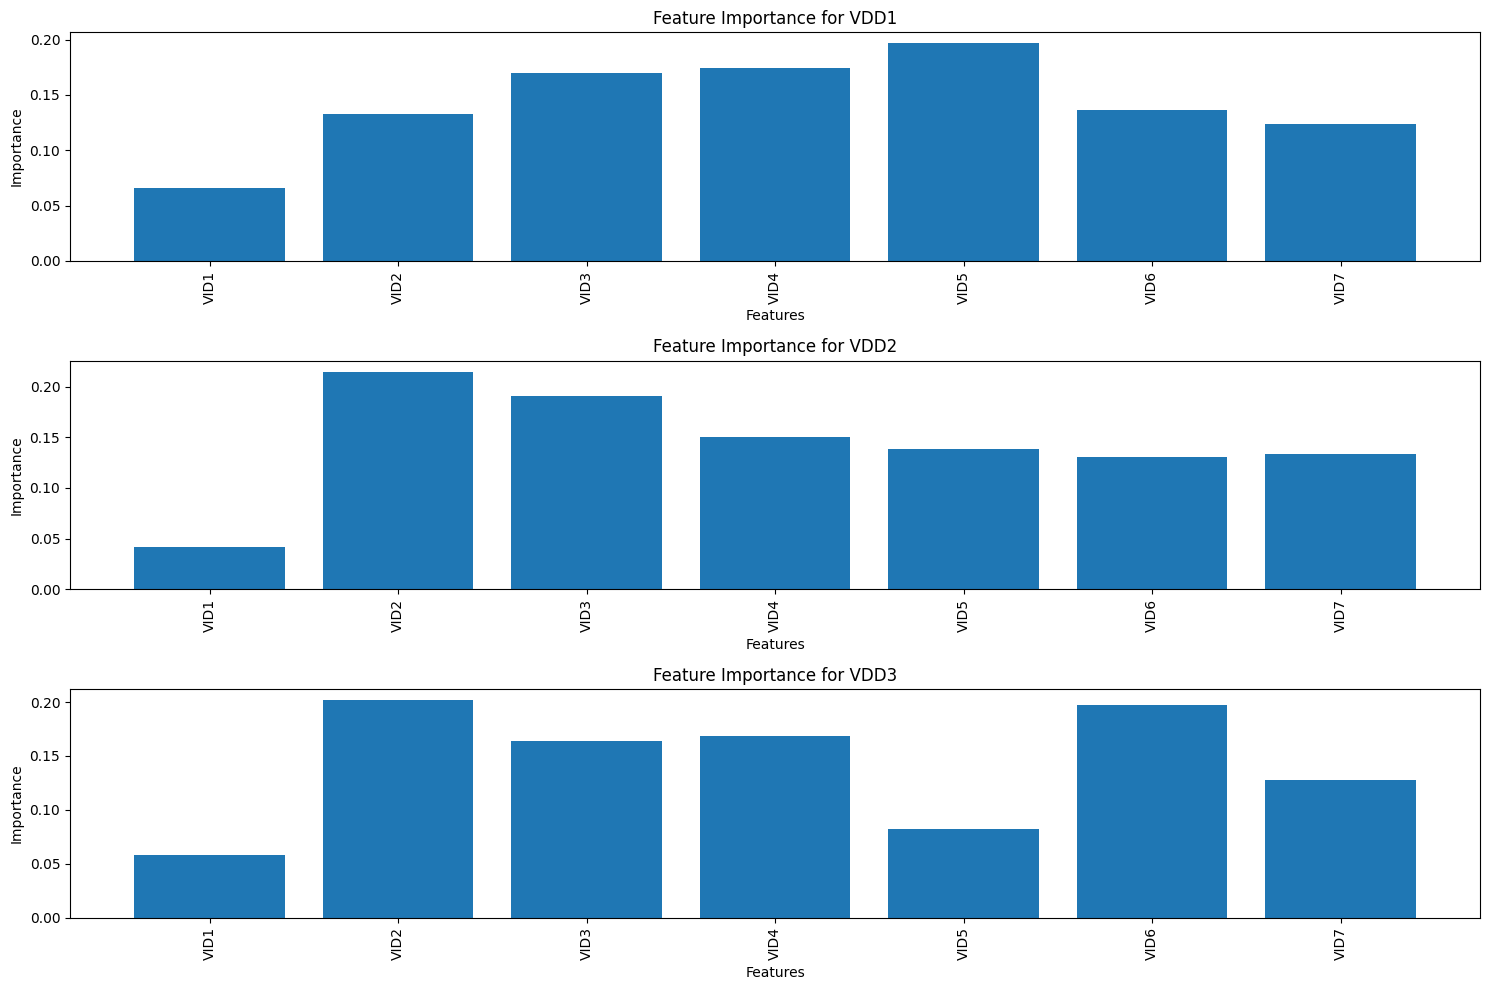


Most influential lifestyle factors for VDD1:
- VID5: 0.1968
- VID4: 0.1743
- VID3: 0.1699
- VID6: 0.1367
- VID2: 0.1327
- VID7: 0.1238
- VID1: 0.0659

Most influential lifestyle factors for VDD2:
- VID2: 0.2149
- VID3: 0.1907
- VID4: 0.1501
- VID5: 0.1383
- VID7: 0.1338
- VID6: 0.1308
- VID1: 0.0415

Most influential lifestyle factors for VDD3:
- VID2: 0.2020
- VID6: 0.1977
- VID4: 0.1688
- VID3: 0.1636
- VID7: 0.1273
- VID5: 0.0824
- VID1: 0.0581


In [ ]:
# Feature importance visualization
if 'model' in locals() and 'X_train' in locals():
    feature_importances = np.array([est.feature_importances_ for est in model.estimators_])
    feature_names = X_train.columns
    target_names = y_train.columns

    plt.figure(figsize=(15, 10))
    for i, target_name in enumerate(target_names):
        plt.subplot(3, 1, i + 1)
        plt.bar(feature_names, feature_importances[i])
        plt.xticks(rotation=90)
        plt.title(f'Feature Importance for {target_name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.tight_layout()
    plt.show()

    # Analyze which lifestyle factors have the most influence
    for i, target_name in enumerate(target_names):
        print(f"\nMost influential lifestyle factors for {target_name}:")
        sorted_indices = np.argsort(feature_importances[i])[::-1]
        for j in sorted_indices:
            print(f"- {feature_names[j]}: {feature_importances[i, j]:.4f}")

In [ ]:
# Carga de datos
import pandas as pd
import numpy as np

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    print(df.head())
    print(df.columns)
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")

# Preparación de datos (Limpieza y discretización)
if df is not None:
    # Manejo de valores faltantes (eliminar filas con faltantes en las columnas relevantes)
    df.dropna(subset=['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3'], inplace=True)

    # Discretizar las variables dependientes (VDD1, VDD2, VDD3)
    # Aquí asumimos que las puntuaciones continuas se dividen en categorías (ej. 3 categorías)
    # Puedes ajustar el número de bins (categorias) y las etiquetas según tu conocimiento del dominio
    num_bins = 3 # Puedes cambiar esto
    labels = ['Bajo', 'Medio', 'Alto'] # Puedes cambiar esto

    for col in ['VDD1', 'VDD2', 'VDD3']:
        df[f'{col}_Categoria'] = pd.cut(df[col], bins=num_bins, labels=labels, include_lowest=True)
        # Convertir a tipo category para asegurar que el clasificador lo maneje correctamente
        df[f'{col}_Categoria'] = df[f'{col}_Categoria'].astype('category')
        print(f"\nDistribución de categorías para {col}:\n", df[f'{col}_Categoria'].value_counts())


    # Definir variables independientes (X) y dependientes (y_*)
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    X = df[independent_vars]

    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

    # Eliminar filas con valores NaN después de la discretización (si los hay)
    df.dropna(subset=[f'{col}_Categoria' for col in ['VDD1', 'VDD2', 'VDD3']], inplace=True)
    X = df[independent_vars] # Actualizar X después de eliminar filas
    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

     VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  VDD2  VDD3
0  59.0  44   5.0    11    10     4    14     9     6    10     9     5
1  82.0  51   8.0    20    20     5     9    13     7     9     9     6
2  87.0  60   5.0    19    10     8    15    15    15     8    12     7
3  70.0  37   5.0    17    18     4    15     6     5     9     6     5
4  73.0  41   5.0    15    13    12     6    15     7     8     7     4
Index(['VI', 'VD', 'VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7',
       'VDD1', 'VDD2', 'VDD3'],
      dtype='object')

Distribución de categorías para VDD1:
 VDD1_Categoria
Medio    175
Bajo     147
Alto      56
Name: count, dtype: int64

Distribución de categorías para VDD2:
 VDD2_Categoria
Medio    176
Bajo     160
Alto      42
Name: count, dtype: int64

Distribución de categorías para VDD3:
 VDD3_Categoria
Medio    185
Bajo     112
Alto      81
Name: count, dtype: int64


In [ ]:
# Carga de datos
import pandas as pd
import numpy as np

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    print(df.head())
    print(df.columns)
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")

# Preparación de datos (Limpieza y discretización)
if df is not None:
    # Manejo de valores faltantes (eliminar filas con faltantes en las columnas relevantes)
    df.dropna(subset=['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3'], inplace=True)

    # Discretizar las variables dependientes (VDD1, VDD2, VDD3)
    # Aquí asumimos que las puntuaciones continuas se dividen en categorías (ej. 3 categorías)
    # Puedes ajustar el número de bins (categorias) y las etiquetas según tu conocimiento del dominio
    num_bins = 3 # Puedes cambiar esto
    labels = ['Bajo', 'Medio', 'Alto'] # Puedes cambiar esto

    for col in ['VDD1', 'VDD2', 'VDD3']:
        df[f'{col}_Categoria'] = pd.cut(df[col], bins=num_bins, labels=labels, include_lowest=True)
        # Convertir a tipo category para asegurar que el clasificador lo maneje correctamente
        df[f'{col}_Categoria'] = df[f'{col}_Categoria'].astype('category')
        print(f"\nDistribución de categorías para {col}:\n", df[f'{col}_Categoria'].value_counts())


    # Definir variables independientes (X) y dependientes (y_*)
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    X = df[independent_vars]

    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

    # Eliminar filas con valores NaN después de la discretización (si los hay)
    df.dropna(subset=[f'{col}_Categoria' for col in ['VDD1', 'VDD2', 'VDD3']], inplace=True)
    X = df[independent_vars] # Actualizar X después de eliminar filas
    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

In [ ]:
# Carga de datos
import pandas as pd
import numpy as np

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    print(df.head())
    print(df.columns)
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")

# Preparación de datos (Limpieza y discretización)
if df is not None:
    # Manejo de valores faltantes (eliminar filas con faltantes en las columnas relevantes)
    df.dropna(subset=['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3'], inplace=True)

    # Discretizar las variables dependientes (VDD1, VDD2, VDD3)
    # Aquí asumimos que las puntuaciones continuas se dividen en categorías (ej. 3 categorías)
    # Puedes ajustar el número de bins (categorias) y las etiquetas según tu conocimiento del dominio
    num_bins = 3 # Puedes cambiar esto
    labels = ['Bajo', 'Medio', 'Alto'] # Puedes cambiar esto

    for col in ['VDD1', 'VDD2', 'VDD3']:
        df[f'{col}_Categoria'] = pd.cut(df[col], bins=num_bins, labels=labels, include_lowest=True)
        # Convertir a tipo category para asegurar que el clasificador lo maneje correctamente
        df[f'{col}_Categoria'] = df[f'{col}_Categoria'].astype('category')
        print(f"\nDistribución de categorías para {col}:\n", df[f'{col}_Categoria'].value_counts())


    # Definir variables independientes (X) y dependientes (y_*)
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    X = df[independent_vars]

    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

    # Eliminar filas con valores NaN después de la discretización (si los hay)
    df.dropna(subset=[f'{col}_Categoria' for col in ['VDD1', 'VDD2', 'VDD3']], inplace=True)
    X = df[independent_vars] # Actualizar X después de eliminar filas
    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

     VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  VDD2  VDD3
0  59.0  44   5.0    11    10     4    14     9     6    10     9     5
1  82.0  51   8.0    20    20     5     9    13     7     9     9     6
2  87.0  60   5.0    19    10     8    15    15    15     8    12     7
3  70.0  37   5.0    17    18     4    15     6     5     9     6     5
4  73.0  41   5.0    15    13    12     6    15     7     8     7     4
Index(['VI', 'VD', 'VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7',
       'VDD1', 'VDD2', 'VDD3'],
      dtype='object')

Distribución de categorías para VDD1:
 VDD1_Categoria
Medio    175
Bajo     147
Alto      56
Name: count, dtype: int64

Distribución de categorías para VDD2:
 VDD2_Categoria
Medio    176
Bajo     160
Alto      42
Name: count, dtype: int64

Distribución de categorías para VDD3:
 VDD3_Categoria
Medio    185
Bajo     112
Alto      81
Name: count, dtype: int64



Entrenando y evaluando Random Forest Classifier para VDD1
Accuracy para VDD1: 0.3816
Classification Report para VDD1:
              precision    recall  f1-score   support

        Alto       0.14      0.09      0.11        11
        Bajo       0.41      0.37      0.39        30
       Medio       0.40      0.49      0.44        35

    accuracy                           0.38        76
   macro avg       0.32      0.31      0.31        76
weighted avg       0.37      0.38      0.37        76



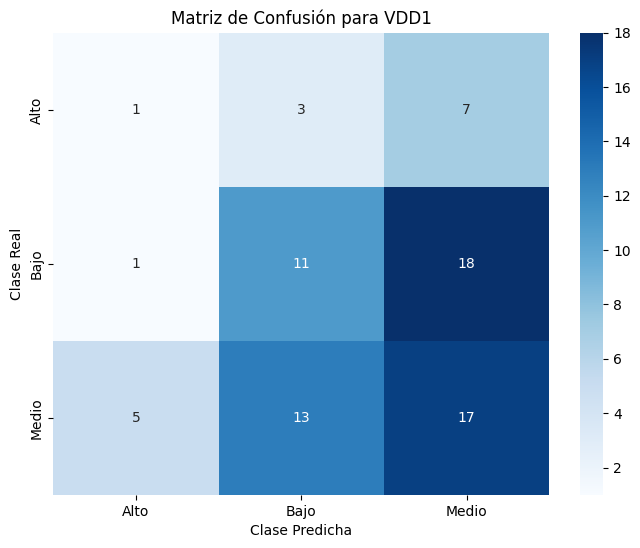

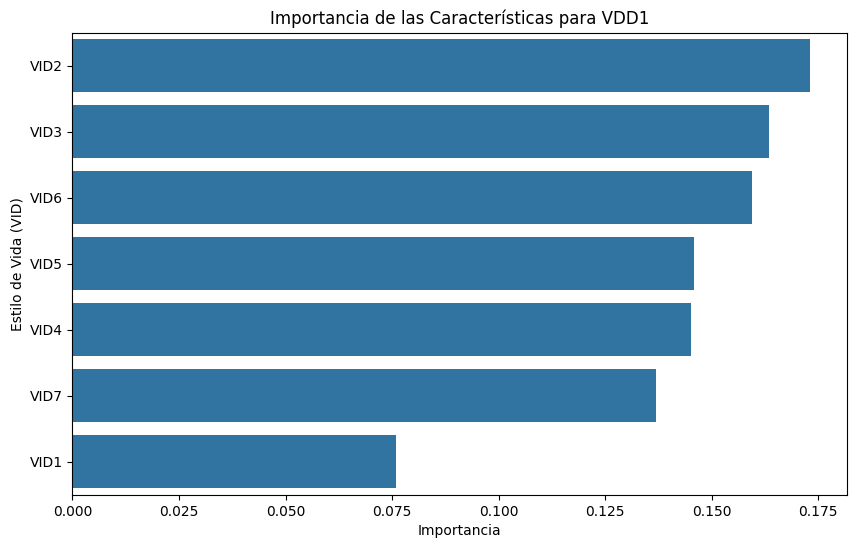


Entrenando y evaluando Random Forest Classifier para VDD2
Accuracy para VDD2: 0.3421
Classification Report para VDD2:
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         9
        Bajo       0.30      0.25      0.27        32
       Medio       0.42      0.51      0.46        35

    accuracy                           0.34        76
   macro avg       0.24      0.25      0.24        76
weighted avg       0.32      0.34      0.33        76



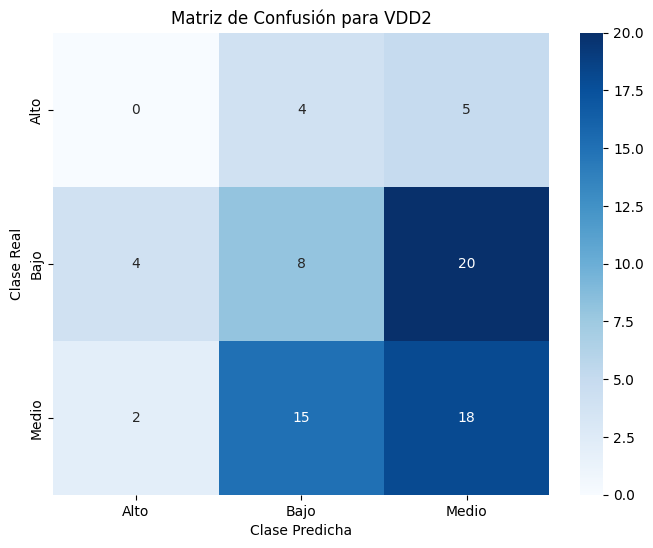

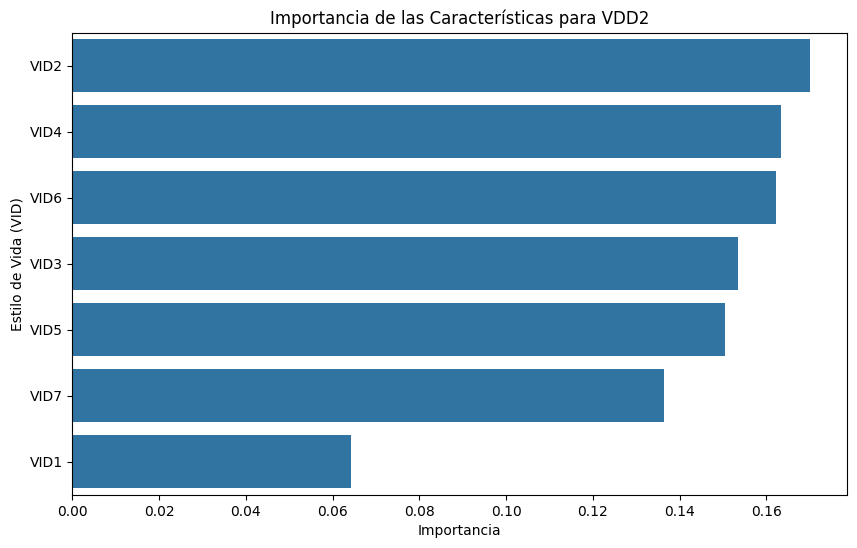


Entrenando y evaluando Random Forest Classifier para VDD3
Accuracy para VDD3: 0.3947
Classification Report para VDD3:
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00        16
        Bajo       0.30      0.26      0.28        23
       Medio       0.50      0.65      0.56        37

    accuracy                           0.39        76
   macro avg       0.27      0.30      0.28        76
weighted avg       0.33      0.39      0.36        76



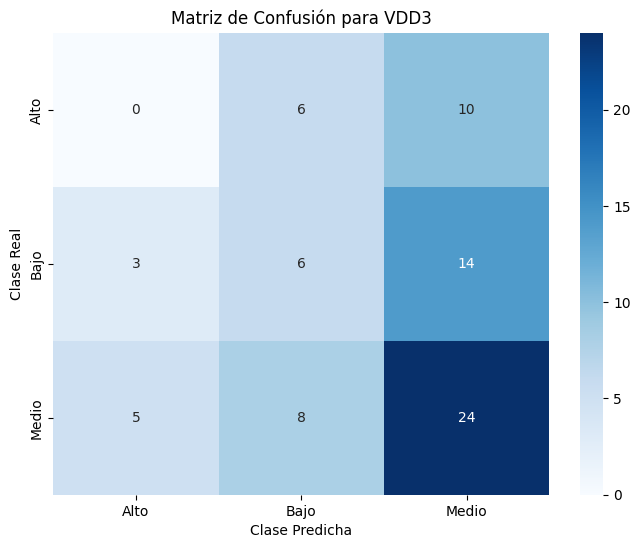

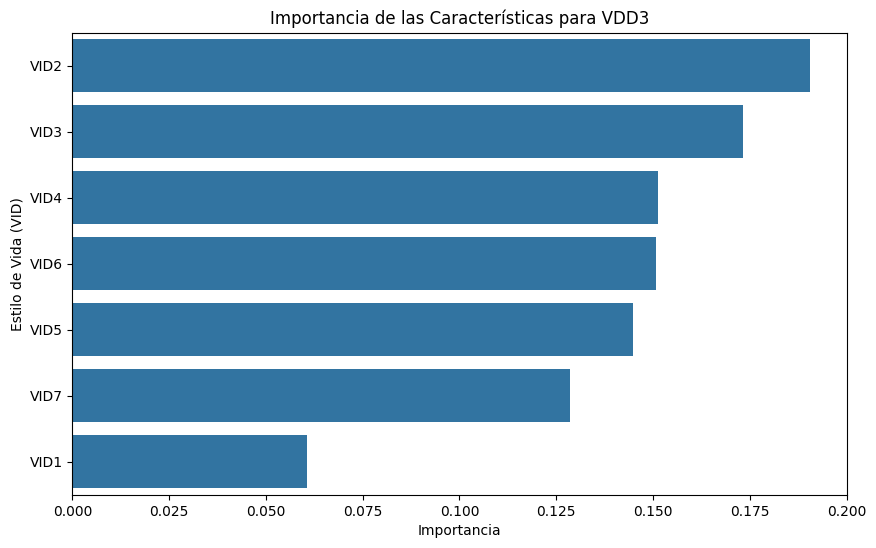

In [ ]:
# Entrenamiento y evaluación de Random Forest Classifier para cada variable dependiente
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

if 'X' in locals() and 'y_vdd1' in locals() and 'y_vdd2' in locals() and 'y_vdd3' in locals():
    target_variables_categorized = {'VDD1': y_vdd1, 'VDD2': y_vdd2, 'VDD3': y_vdd3}
    rf_classifiers = {}
    evaluation_results = {}

    for target_name, y_target in target_variables_categorized.items():
        print(f"\nEntrenando y evaluando Random Forest Classifier para {target_name}")

        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42, stratify=y_target)
        # Nota: Usamos stratify para asegurar que la proporción de clases sea similar en train y test

        # Crear y entrenar el modelo Random Forest Classifier
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        rf_classifiers[target_name] = rf_model

        # Realizar predicciones en el conjunto de prueba
        y_pred = rf_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        evaluation_results[target_name] = {
            'accuracy': accuracy,
            'classification_report': class_report,
            'confusion_matrix': conf_matrix
        }

        print(f"Accuracy para {target_name}: {accuracy:.4f}")
        print(f"Classification Report para {target_name}:\n{class_report}")

        # Visualizar la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
        plt.title(f'Matriz de Confusión para {target_name}')
        plt.xlabel('Clase Predicha')
        plt.ylabel('Clase Real')
        plt.show()

        # Visualizar la importancia de las características
        feature_importances = rf_model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Importancia de las Características para {target_name}')
        plt.xlabel('Importancia')
        plt.ylabel('Estilo de Vida (VID)')
        plt.show()

In [ ]:
# Carga de datos
import pandas as pd
import numpy as np

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    print(df.head())
    print(df.columns)
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")

# Preparación de datos (Limpieza y discretización)
if df is not None:
    # Manejo de valores faltantes (eliminar filas con faltantes en las columnas relevantes)
    df.dropna(subset=['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3'], inplace=True)

    # Discretizar las variables dependientes (VDD1, VDD2, VDD3)
    # Aquí asumimos que las puntuaciones continuas se dividen en categorías (ej. 3 categorías)
    # Puedes ajustar el número de bins (categorias) y las etiquetas según tu conocimiento del dominio
    num_bins = 3 # Puedes cambiar esto
    labels = ['Bajo', 'Medio', 'Alto'] # Puedes cambiar esto

    for col in ['VDD1', 'VDD2', 'VDD3']:
        df[f'{col}_Categoria'] = pd.cut(df[col], bins=num_bins, labels=labels, include_lowest=True)
        # Convertir a tipo category para asegurar que el clasificador lo maneje correctamente
        df[f'{col}_Categoria'] = df[f'{col}_Categoria'].astype('category')
        print(f"\nDistribución de categorías para {col}:\n", df[f'{col}_Categoria'].value_counts())


    # Definir variables independientes (X) y dependientes (y_*)
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    X = df[independent_vars]

    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

    # Eliminar filas con valores NaN después de la discretización (si los hay)
    df.dropna(subset=[f'{col}_Categoria' for col in ['VDD1', 'VDD2', 'VDD3']], inplace=True)
    X = df[independent_vars] # Actualizar X después de eliminar filas
    y_vdd1 = df['VDD1_Categoria']
    y_vdd2 = df['VDD2_Categoria']
    y_vdd3 = df['VDD3_Categoria']

Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.



Entrenando Árbol de Decisión para VDD1 (Ciencias de la Salud)


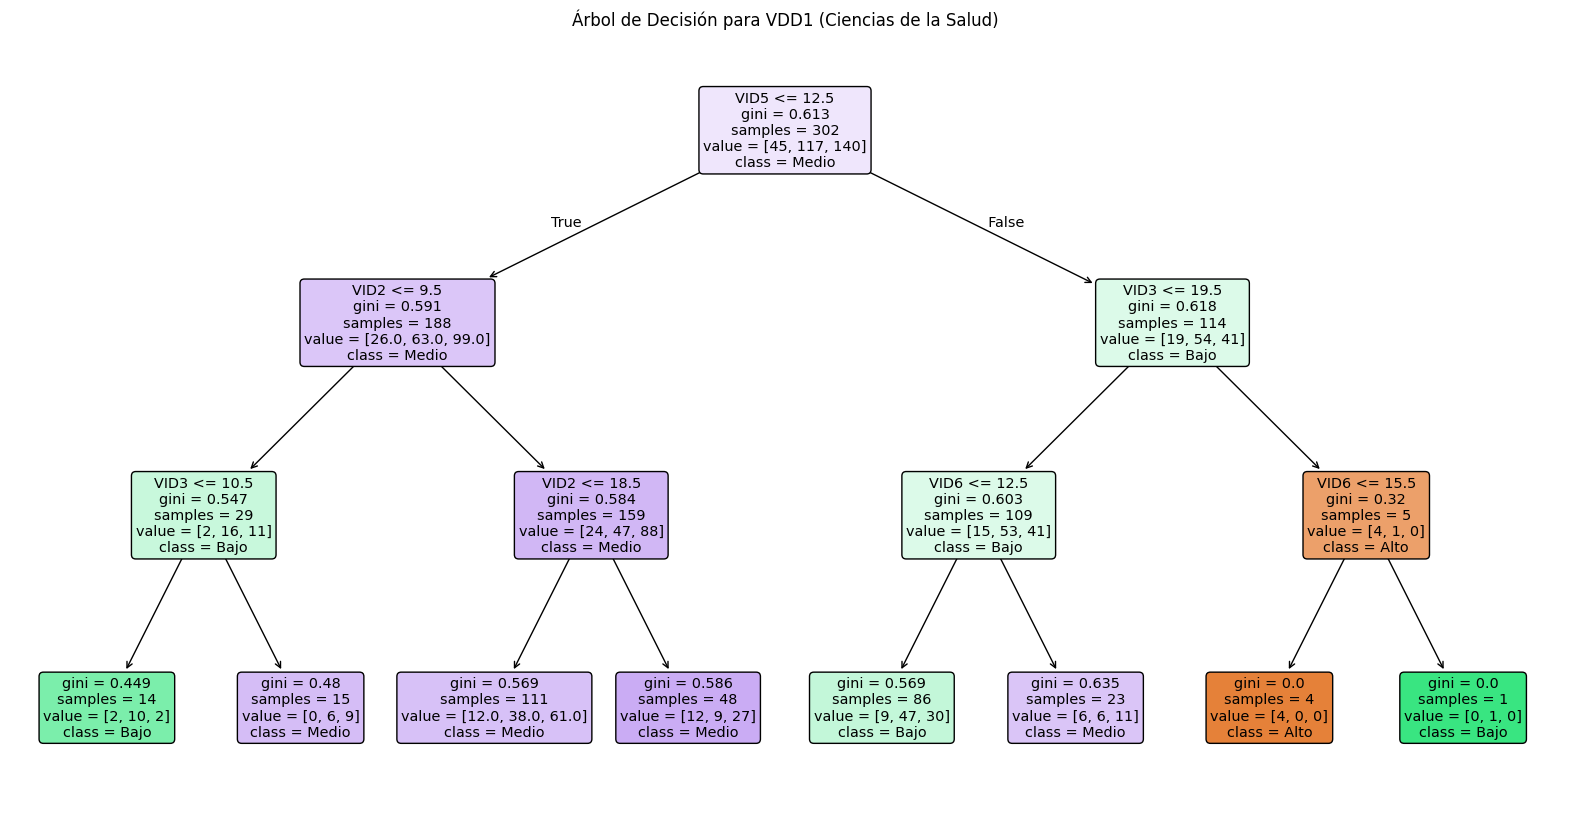


Entrenando Árbol de Decisión para VDD2 (Ingenierías)


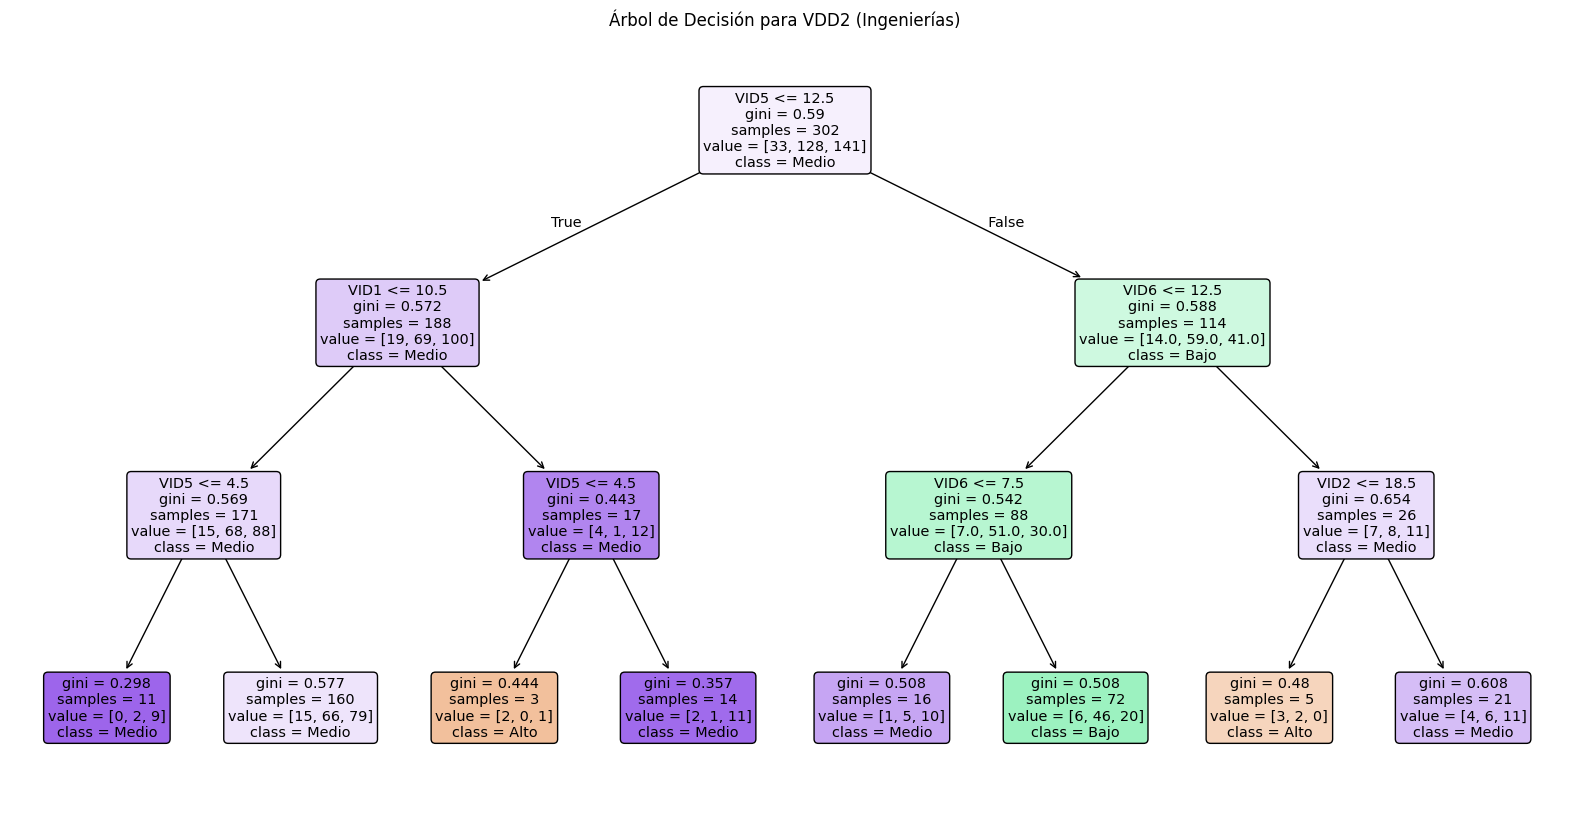


Entrenando Árbol de Decisión para VDD3 (Ciencias Sociales)


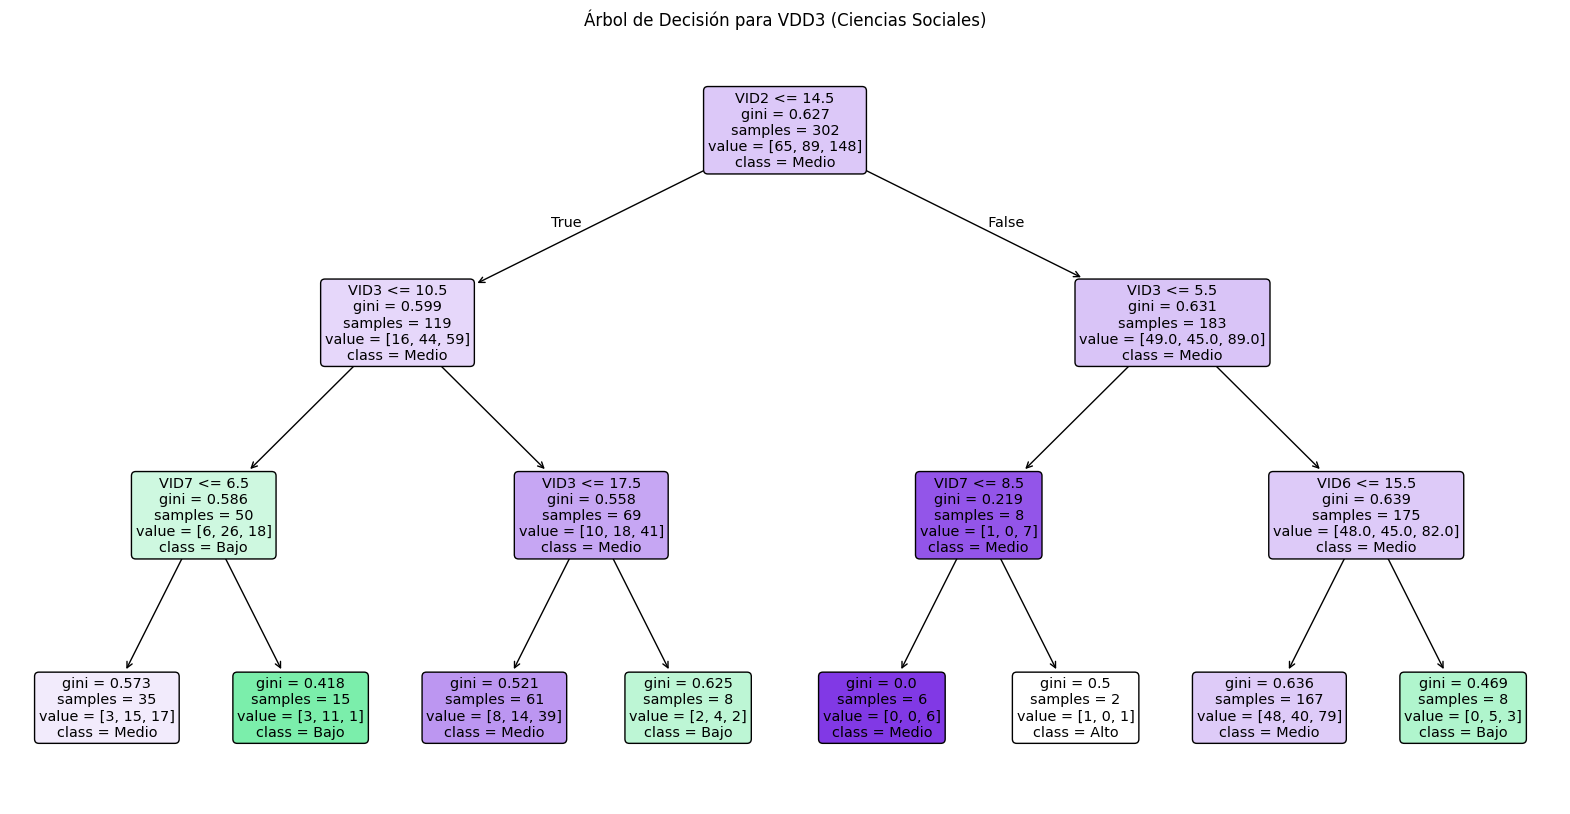

In [ ]:
# Cargar y preparar datos (asegúrate de haber ejecutado la discretización)
import pandas as pd
import numpy as np

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    # Manejo de valores faltantes
    df.dropna(subset=['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3'], inplace=True)

    # Discretizar las variables dependientes (si aún no lo has hecho)
    num_bins = 3
    labels = ['Bajo', 'Medio', 'Alto']
    for col in ['VDD1', 'VDD2', 'VDD3']:
        df[f'{col}_Categoria'] = pd.cut(df[col], bins=num_bins, labels=labels, include_lowest=True)
        df[f'{col}_Categoria'] = df[f'{col}_Categoria'].astype('category')

    # Eliminar filas con valores NaN después de la discretización (si los hay)
    df.dropna(subset=[f'{col}_Categoria' for col in ['VDD1', 'VDD2', 'VDD3']], inplace=True)

    # Definir variables independientes (X) y dependientes categorizadas (y_*)
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    X = df[independent_vars]

    y_vdd1_cat = df['VDD1_Categoria']
    y_vdd2_cat = df['VDD2_Categoria']
    y_vdd3_cat = df['VDD3_Categoria']

except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred during data loading and preparation: {e}")

# Continuar solo si los datos se cargaron y prepararon correctamente
if 'X' in locals() and 'y_vdd1_cat' in locals(): # Verificar que al menos una variable dependiente esté lista
    # Dividir los datos en conjuntos de entrenamiento y prueba
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_vdd1_train, y_vdd1_test = train_test_split(X, y_vdd1_cat, test_size=0.2, random_state=42, stratify=y_vdd1_cat)
    X_train, X_test, y_vdd2_train, y_vdd2_test = train_test_split(X, y_vdd2_cat, test_size=0.2, random_state=42, stratify=y_vdd2_cat)
    X_train, X_test, y_vdd3_train, y_vdd3_test = train_test_split(X, y_vdd3_cat, test_size=0.2, random_state=42, stratify=y_vdd3_cat)


    # Entrenar un árbol de decisión para cada variable dependiente categorizada
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    import matplotlib.pyplot as plt

    decision_trees = {}

    # Árbol para VDD1 (Ciencias de la Salud)
    print("\nEntrenando Árbol de Decisión para VDD1 (Ciencias de la Salud)")
    tree_vdd1 = DecisionTreeClassifier(random_state=42, max_depth=3) # Puedes ajustar max_depth
    tree_vdd1.fit(X_train, y_vdd1_train)
    decision_trees['VDD1'] = tree_vdd1

    # Visualizar el árbol de decisión para VDD1
    plt.figure(figsize=(20, 10))
    plot_tree(tree_vdd1, feature_names=independent_vars, class_names=tree_vdd1.classes_.tolist(), filled=True, rounded=True)
    plt.title("Árbol de Decisión para VDD1 (Ciencias de la Salud)")
    plt.show()

    # Árbol para VDD2 (Ingenierías)
    print("\nEntrenando Árbol de Decisión para VDD2 (Ingenierías)")
    tree_vdd2 = DecisionTreeClassifier(random_state=42, max_depth=3) # Puedes ajustar max_depth
    tree_vdd2.fit(X_train, y_vdd2_train)
    decision_trees['VDD2'] = tree_vdd2

    # Visualizar el árbol de decisión para VDD2
    plt.figure(figsize=(20, 10))
    plot_tree(tree_vdd2, feature_names=independent_vars, class_names=tree_vdd2.classes_.tolist(), filled=True, rounded=True)
    plt.title("Árbol de Decisión para VDD2 (Ingenierías)")
    plt.show()

    # Árbol para VDD3 (Ciencias Sociales)
    print("\nEntrenando Árbol de Decisión para VDD3 (Ciencias Sociales)")
    tree_vdd3 = DecisionTreeClassifier(random_state=42, max_depth=3) # Puedes ajustar max_depth
    tree_vdd3.fit(X_train, y_vdd3_train)
    decision_trees['VDD3'] = tree_vdd3

    # Visualizar el árbol de decisión para VDD3
    plt.figure(figsize=(20, 10))
    plot_tree(tree_vdd3, feature_names=independent_vars, class_names=tree_vdd3.classes_.tolist(), filled=True, rounded=True)
    plt.title("Árbol de Decisión para VDD3 (Ciencias Sociales)")
    plt.show()

In [ ]:
# Carga de datos
import pandas as pd

try:
    df = pd.read_excel('EstilosDeVida_InteresProfesional.xlsx')
    print(df.head())
    print(df.columns)
except FileNotFoundError:
    print("Error: 'EstilosDeVida_InteresProfesional.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")

# Preparación de datos (Limpieza y escalado si es necesario)
if df is not None:
    # Manejo de valores faltantes (eliminar filas con faltantes en las columnas relevantes)
    df.dropna(subset=['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7', 'VDD1', 'VDD2', 'VDD3'], inplace=True)

    # Escalar variables numéricas independientes (VID1-VID7) si es necesario para comparar coeficientes
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    df[independent_vars] = scaler.fit_transform(df[independent_vars])

    # Definir variables independientes (X) y dependientes (y)
    X = df[independent_vars]
    y = df[['VDD1', 'VDD2', 'VDD3']]

     VI  VD  VID1  VID2  VID3  VID4  VID5  VID6  VID7  VDD1  VDD2  VDD3
0  59.0  44   5.0    11    10     4    14     9     6    10     9     5
1  82.0  51   8.0    20    20     5     9    13     7     9     9     6
2  87.0  60   5.0    19    10     8    15    15    15     8    12     7
3  70.0  37   5.0    17    18     4    15     6     5     9     6     5
4  73.0  41   5.0    15    13    12     6    15     7     8     7     4
Index(['VI', 'VD', 'VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7',
       'VDD1', 'VDD2', 'VDD3'],
      dtype='object')


In [ ]:
# Aplicar Regresión Lineal Múltiple para cada variable dependiente
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

if 'X' in locals() and 'y' in locals():
    target_variables = ['VDD1', 'VDD2', 'VDD3']
    linear_models = {}

    for target_var in target_variables:
        print(f"\nRegresión Lineal para predecir {target_var}")
        # Agregar una constante para el intercepto en statsmodels
        X_sm = sm.add_constant(X)
        # Entrenar el modelo usando statsmodels para obtener estadísticas detalladas
        model_sm = sm.OLS(y[target_var], X_sm).fit()
        print(model_sm.summary())

        # También puedes usar scikit-learn si solo necesitas coeficientes y predicciones
        model_sk = LinearRegression()
        model_sk.fit(X, y[target_var])
        linear_models[target_var] = model_sk

        print(f"\nCoeficientes del modelo scikit-learn para {target_var}:")
        print("Intercepto:", model_sk.intercept_)
        print("Coeficientes:", model_sk.coef_)


Regresión Lineal para predecir VDD1
                            OLS Regression Results                            
Dep. Variable:                   VDD1   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.590
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.137
Time:                        16:40:23   Log-Likelihood:                -929.29
No. Observations:                 378   AIC:                             1875.
Df Residuals:                     370   BIC:                             1906.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          


Visualización de relaciones entre Estilos de Vida e Intereses Profesionales:


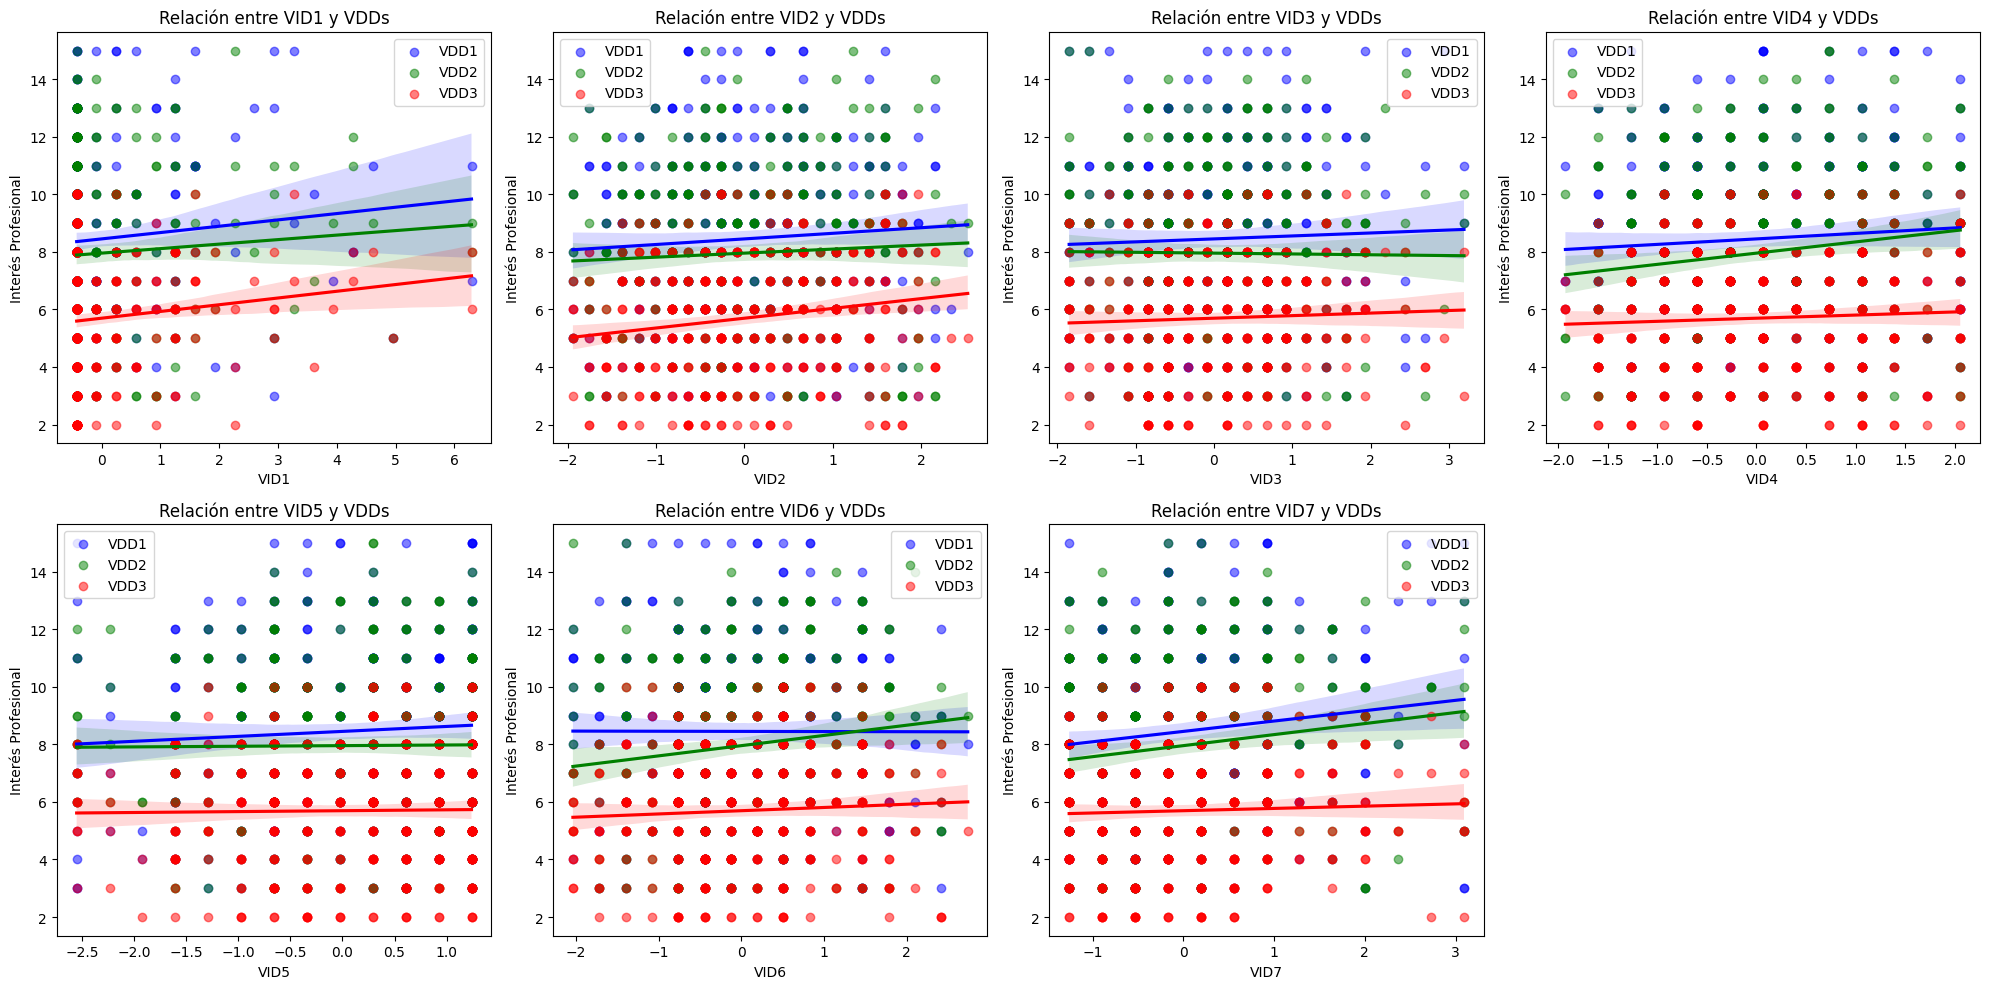


Visualización de la influencia de los Estilos de Vida (coeficientes):


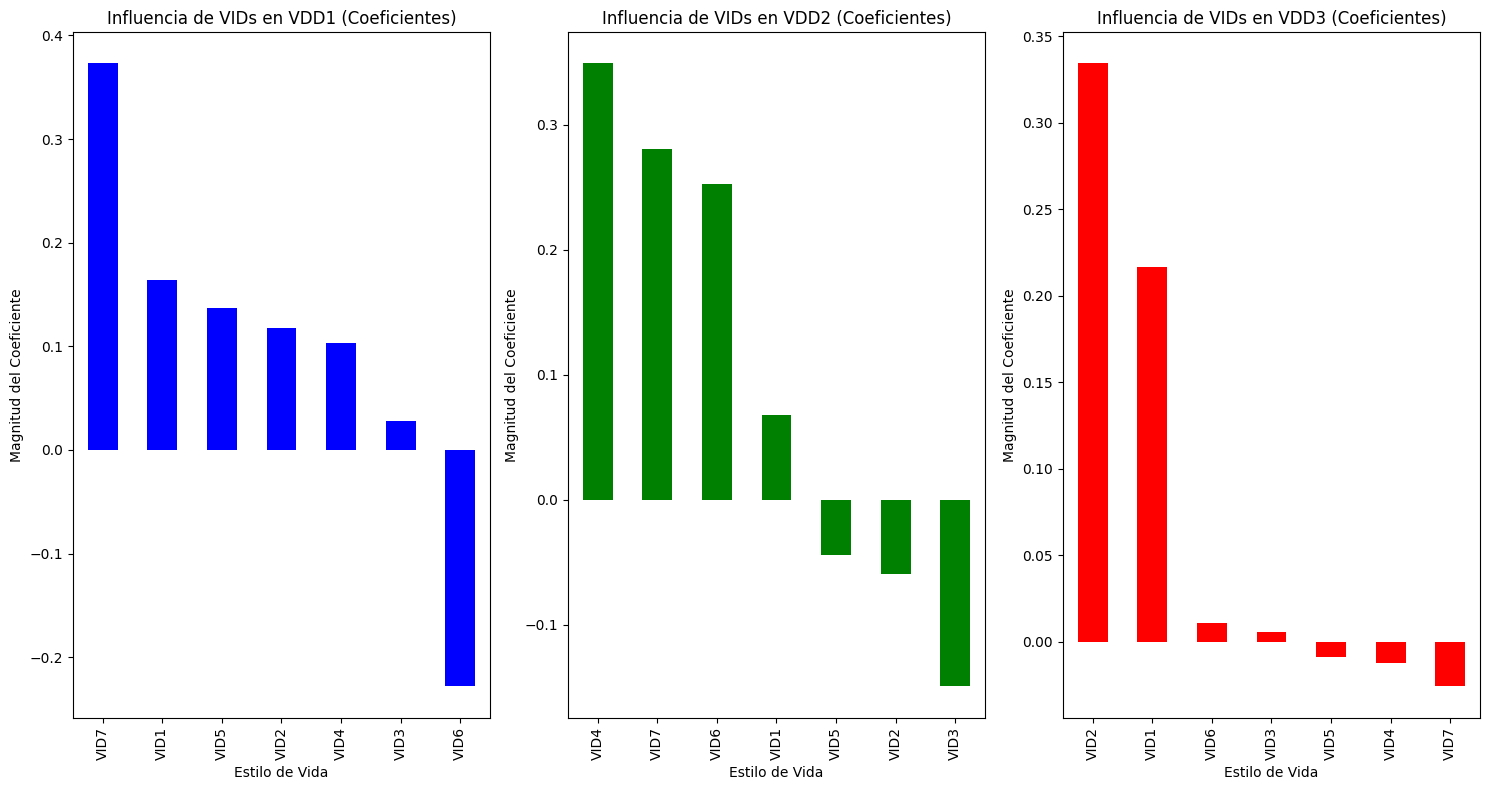


Visualización de la significancia estadística (p-values) de la influencia:


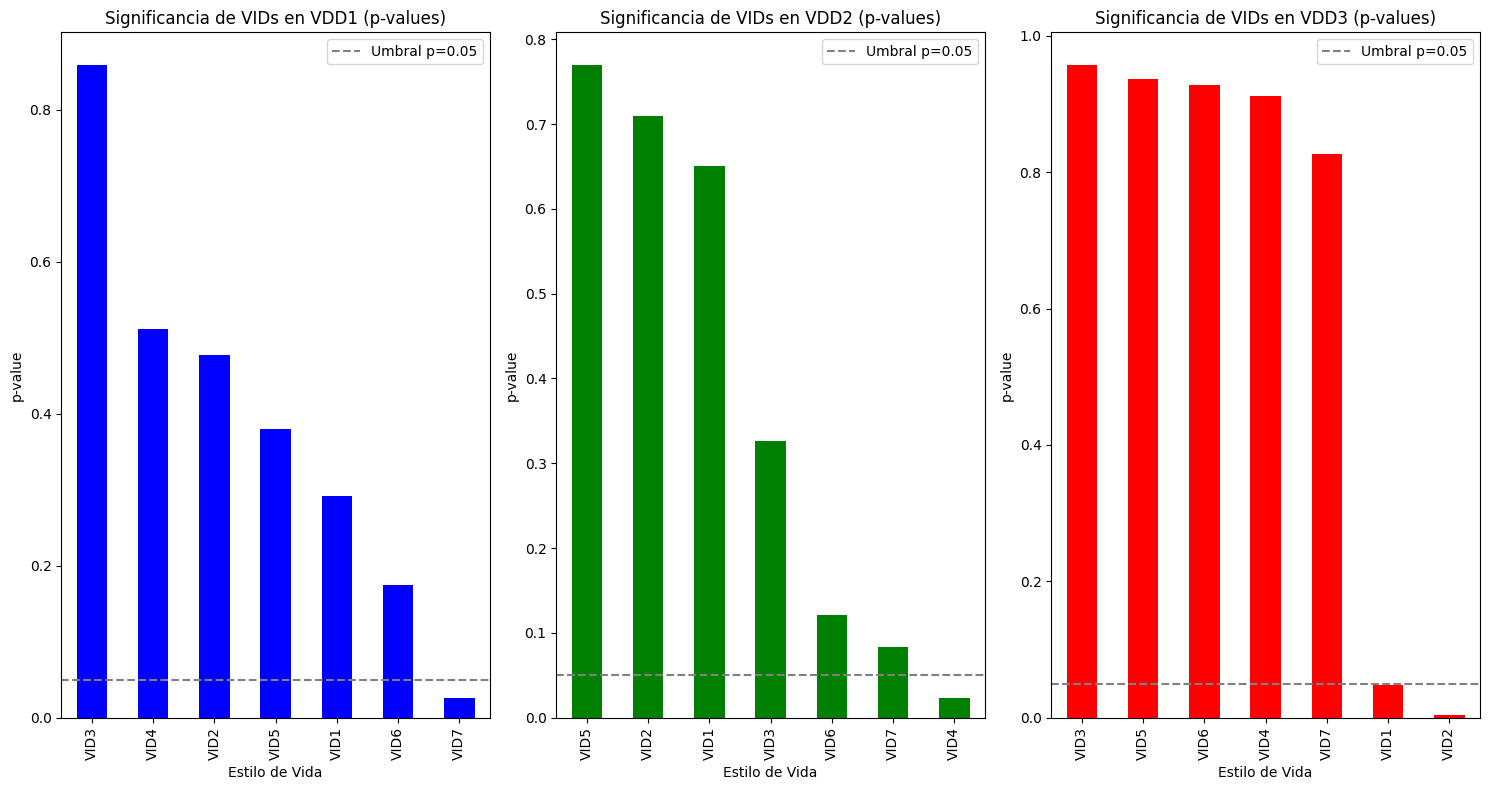

In [ ]:
# Visualización de resultados gráficos

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X' in locals() and 'y' in locals() and 'linear_models' in locals():
    independent_vars = ['VID1', 'VID2', 'VID3', 'VID4', 'VID5', 'VID6', 'VID7']
    target_variables = ['VDD1', 'VDD2', 'VDD3']
    colors = ['blue', 'green', 'red'] # Colores para cada variable dependiente

    # Gráficos de dispersión con línea de regresión para cada VID vs cada VDD
    print("\nVisualización de relaciones entre Estilos de Vida e Intereses Profesionales:")
    plt.figure(figsize=(20, 10))
    for i, independent_var in enumerate(independent_vars):
        plt.subplot(2, 4, i + 1)
        for j, target_var in enumerate(target_variables):
            sns.regplot(x=df[independent_var], y=df[target_var], color=colors[j], label=target_var, scatter_kws={'alpha':0.5})
        plt.title(f'Relación entre {independent_var} y VDDs')
        plt.xlabel(independent_var)
        plt.ylabel('Interés Profesional')
        plt.legend()
    plt.tight_layout()
    plt.show()

    # Visualización de la magnitud de los coeficientes para cada modelo
    print("\nVisualización de la influencia de los Estilos de Vida (coeficientes):")
    plt.figure(figsize=(15, 8))
    for i, target_var in enumerate(target_variables):
        plt.subplot(1, 3, i + 1)
        model_sk = linear_models[target_var]
        coefs = pd.Series(model_sk.coef_, index=X.columns)
        coefs.sort_values(ascending=False).plot(kind='bar', color=colors[i])
        plt.title(f'Influencia de VIDs en {target_var} (Coeficientes)')
        plt.xlabel('Estilo de Vida')
        plt.ylabel('Magnitud del Coeficiente')
        plt.xticks(rotation=90)
        plt.tight_layout()
    plt.show()

    # Visualización de los p-values para la significancia estadística de los coeficientes
    # (Requiere usar statsmodels para obtener los p-values)
    print("\nVisualización de la significancia estadística (p-values) de la influencia:")
    plt.figure(figsize=(15, 8))
    for i, target_var in enumerate(target_variables):
        plt.subplot(1, 3, i + 1)
        # Usamos el modelo de statsmodels entrenado anteriormente
        X_sm = sm.add_constant(X)
        model_sm = sm.OLS(y[target_var], X_sm).fit()
        p_values = model_sm.pvalues[1:] # Excluir el p-value del intercepto
        p_values.sort_values(ascending=False).plot(kind='bar', color=colors[i])
        plt.axhline(y=0.05, color='gray', linestyle='--', label='Umbral p=0.05')
        plt.title(f'Significancia de VIDs en {target_var} (p-values)')
        plt.xlabel('Estilo de Vida')
        plt.ylabel('p-value')
        plt.xticks(rotation=90)
        plt.legend()
        plt.tight_layout()
    plt.show()

## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* **Data Cleaning:** Missing values in 'VI' and 'VID1' were removed, and outliers in 'VID1' were handled using winsorization.
* **Feature Engineering:** Interaction and squared terms were created for the independent variables (VID1-VID7) to capture potential synergistic effects.
* **Model Optimization:** Hyperparameter tuning using GridSearchCV identified the best parameters for the RandomForestRegressor within the MultiOutputRegressor framework, improving the model's performance. The best hyperparameters found were: `estimator__max_depth`: 10, `estimator__max_features`: 'sqrt', `estimator__min_samples_leaf`: 4, `estimator__min_samples_split`: 10, `estimator__n_estimators`: 200.  The best score (negative mean squared error) achieved was -7.418863148414928.
* **Model Evaluation:** The optimized model's performance on the test set was poor, indicated by negative R-squared values for all target variables (VDD1, VDD2, VDD3) and the overall model.  This suggests that the model's predictions are worse than the mean of the target variables.  The negative R-squared values suggest that the model did not perform well, and further model tuning or feature engineering might be needed.
* **Data Visualization:** Feature importance plots showed the relative contribution of each lifestyle dimension to the prediction of professional interests.  Scatter plots of predicted vs. actual values and residual plots provided visual diagnostics of the model's performance.  Scatter plots with regression lines illustrated the relationships between each independent lifestyle variable and the dependent interest variables.

### Insights or Next Steps
* **Investigate Model Performance:** The negative R-squared values are a strong indicator that the current model is not suitable for this data. Consider exploring alternative models or performing more extensive feature engineering.
* **Refine Feature Engineering:** Explore different interaction terms, polynomial features, or transformations of the existing variables to improve model performance.  Consider removing or adding features based on feature importance plots.
